
--- Fold 1 ---
Training Set - MSE: 9.43007, MAE: 2.64767, R^2: 0.96846
Validation Set - MSE: 569.68004, MAE: 18.27899, R^2: -0.90675

--- Fold 2 ---
Training Set - MSE: 29.24621, MAE: 4.21250, R^2: 0.90641
Validation Set - MSE: 188.09121, MAE: 12.45409, R^2: 0.24708

--- Fold 3 ---
Training Set - MSE: 88.64556, MAE: 8.14829, R^2: 0.71740
Validation Set - MSE: 240.71433, MAE: 13.48256, R^2: -4.11954

--- Fold 4 ---
Training Set - MSE: 87.38361, MAE: 7.80349, R^2: 0.59541
Validation Set - MSE: 273.91139, MAE: 14.47189, R^2: -0.11061

--- Fold 5 ---
Training Set - MSE: 96.01519, MAE: 7.99142, R^2: 0.70838
Validation Set - MSE: 158.39047, MAE: 10.38138, R^2: -0.12676

--- Average Metrics Across 5 Folds ---
Training Set - Avg MSE: 62.14413, Avg MAE: 6.16067, Avg R^2: 0.77921
Validation Set - Avg MSE: 286.15749, Avg MAE: 13.81378, Avg R^2: -1.00332


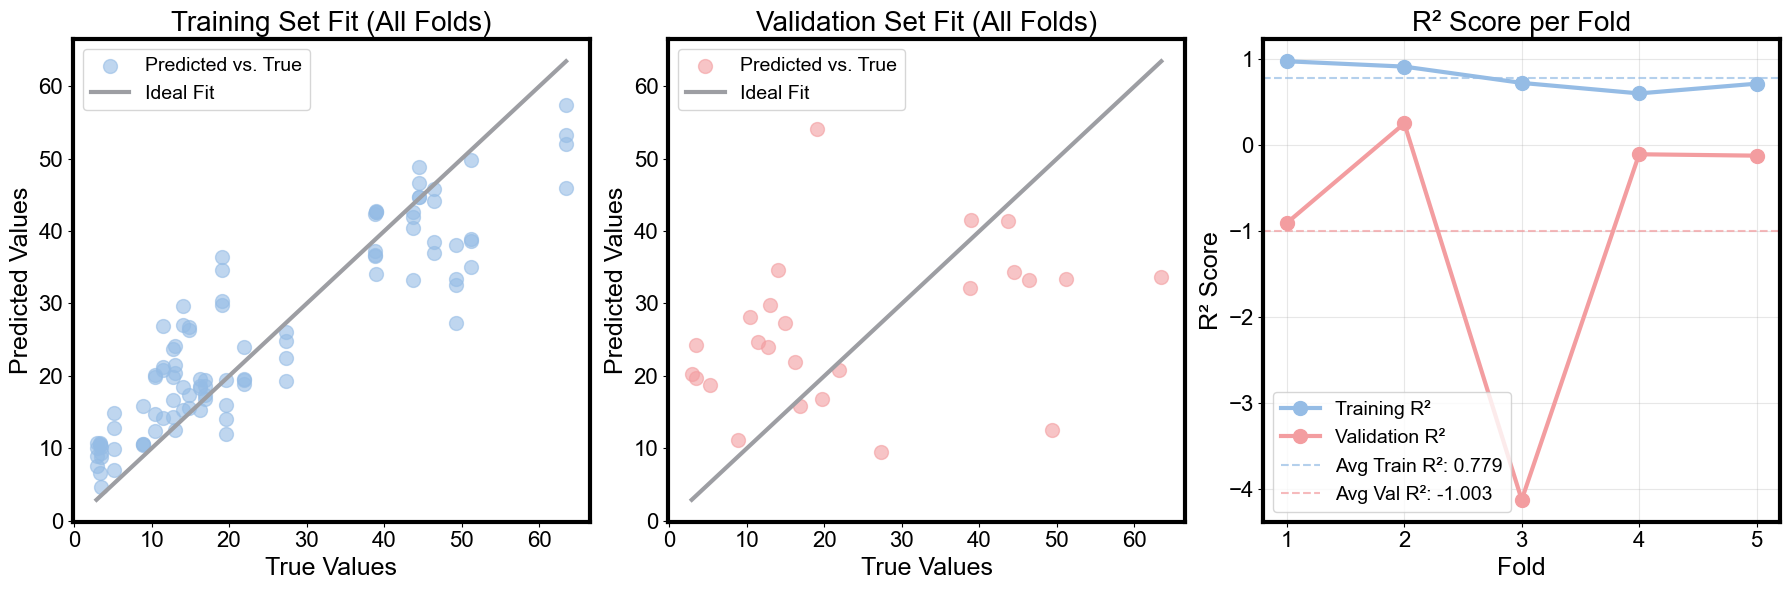

In [ ]:
#ZWY-TabPFN

import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from tabpfn import TabPFNRegressor

plt.rcParams['font.family'] = 'Arial'

# Load data
file_path = r"F-ZWY.xlsx"  # Dataset file path

# Read data
data = pd.read_excel(file_path, header=0)

# Assume the first column is the target variable, remaining columns are features
X = data.iloc[:, 1:]  # Feature data (all columns except first)
y = data.iloc[:, 0]   # Target variable (first column)

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_mse_list = []
train_mae_list = []
train_r2_list = []
val_mse_list = []
val_mae_list = []
val_r2_list = []

# Store all folds' true and predicted values for visualization
all_train_true = []
all_train_pred = []
all_val_true = []
all_val_pred = []

# Perform 5-fold cross-validation
fold_idx = 1
for train_idx, val_idx in kf.split(X):
    print(f"\n--- Fold {fold_idx} ---")
    
    # Split training and validation sets
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Initialize and train model
    reg = TabPFNRegressor()
    reg.fit(X_train, y_train)
    
    # Predict and evaluate on training set
    train_predictions = reg.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    
    # Store training set evaluation results
    train_mse_list.append(train_mse)
    train_mae_list.append(train_mae)
    train_r2_list.append(train_r2)
    
    # Predict and evaluate on validation set
    val_predictions = reg.predict(X_val)
    val_mse = mean_squared_error(y_val, val_predictions)
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)
    
    # Store validation set evaluation results
    val_mse_list.append(val_mse)
    val_mae_list.append(val_mae)
    val_r2_list.append(val_r2)
    
    # Save fold's true and predicted values for visualization
    all_train_true.extend(y_train.tolist())
    all_train_pred.extend(train_predictions.tolist())
    all_val_true.extend(y_val.tolist())
    all_val_pred.extend(val_predictions.tolist())
    
    # Print fold results
    print(f"Training Set - MSE: {train_mse:.5f}, MAE: {train_mae:.5f}, R^2: {train_r2:.5f}")
    print(f"Validation Set - MSE: {val_mse:.5f}, MAE: {val_mae:.5f}, R^2: {val_r2:.5f}")
    
    fold_idx += 1

# Calculate average evaluation metrics
avg_train_mse = np.mean(train_mse_list)
avg_train_mae = np.mean(train_mae_list)
avg_train_r2 = np.mean(train_r2_list)
avg_val_mse = np.mean(val_mse_list)
avg_val_mae = np.mean(val_mae_list)
avg_val_r2 = np.mean(val_r2_list)

# Print average metrics
print("\n--- Average Metrics Across 5 Folds ---")
print(f"Training Set - Avg MSE: {avg_train_mse:.5f}, Avg MAE: {avg_train_mae:.5f}, Avg R^2: {avg_train_r2:.5f}")
print(f"Validation Set - Avg MSE: {avg_val_mse:.5f}, Avg MAE: {avg_val_mae:.5f}, Avg R^2: {avg_val_r2:.5f}")

# Generate fit plots
plt.figure(figsize=(18, 6), dpi=100)

# Training set fit plot
plt.subplot(1, 3, 1)
plt.scatter(all_train_true, all_train_pred, alpha=0.6, color='#95bce5', s=100, label='Predicted vs. True')
min_val = min(min(all_train_true), min(all_train_pred))
max_val = max(max(all_train_true), max(all_train_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='#9D9EA3', label='Ideal Fit', linewidth=3)
plt.title('Training Set Fit (All Folds)', fontsize=20)
plt.xlabel('True Values', fontsize=18)
plt.ylabel('Predicted Values', fontsize=18)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=16)
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

# Validation set fit plot
plt.subplot(1, 3, 2)
plt.scatter(all_val_true, all_val_pred, alpha=0.6, color='#f39da0', s=100, label='Predicted vs. True')
min_val = min(min(all_val_true), min(all_val_pred))
max_val = max(max(all_val_true), max(all_val_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='#9D9EA3', label='Ideal Fit', linewidth=3)
plt.title('Validation Set Fit (All Folds)', fontsize=20)
plt.xlabel('True Values', fontsize=18)
plt.ylabel('Predicted Values', fontsize=18)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=16)
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

# Performance line chart
plt.subplot(1, 3, 3)
folds = range(1, 6)
plt.plot(folds, train_r2_list, 'o-', color='#95bce5', linewidth=3, markersize=10, label='Training R²')
plt.plot(folds, val_r2_list, 'o-', color='#f39da0', linewidth=3, markersize=10, label='Validation R²')
plt.axhline(y=avg_train_r2, color='#95bce5', linestyle='--', alpha=0.7, label=f'Avg Train R²: {avg_train_r2:.3f}')
plt.axhline(y=avg_val_r2, color='#f39da0', linestyle='--', alpha=0.7, label=f'Avg Val R²: {avg_val_r2:.3f}')
plt.title('R² Score per Fold', fontsize=20)
plt.xlabel('Fold', fontsize=18)
plt.ylabel('R² Score', fontsize=18)
plt.xticks(folds)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=16)
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

plt.tight_layout()
plt.show()

data processing

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen, Lipinski, MolSurf, AllChem, rdMolDescriptors
from rdkit.Chem.Fragments import fr_Al_OH, fr_C_O, fr_C_O_noCOO, fr_ester, fr_COO2

# Read CSV file
df = pd.read_csv('ZWY.csv')

# Define function to calculate molecular descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    # Generate 3D coordinates - for certain descriptor calculations
    try:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol, useRandomCoords=True)
        AllChem.MMFFOptimizeMolecule(mol)
    except:
        print(f"Unable to generate 3D coordinates: {smiles}")
    
    descriptors = {
        # Basic physicochemical properties
        'MolWt': Descriptors.MolWt(mol),  # Molecular weight
        'ExactMolWt': Descriptors.ExactMolWt(mol),  # Exact molecular weight
        'LogP': Crippen.MolLogP(mol),  # Partition coefficient
        'TPSA': MolSurf.TPSA(mol),  # Topological polar surface area
        'LabuteASA': MolSurf.LabuteASA(mol),  # Labute surface area
        'NumHAcceptors': Lipinski.NumHAcceptors(mol),  # Number of hydrogen bond acceptors
        'NumHDonors': Lipinski.NumHDonors(mol),  # Number of hydrogen bond donors
        
        # Molecular topology features
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),  # Number of rotatable bonds
        'NumAromaticRings': Descriptors.NumAromaticRings(mol),  # Number of aromatic rings
        'NumSaturatedRings': Descriptors.NumSaturatedRings(mol),  # Number of saturated rings
        'NumAliphaticRings': Descriptors.NumAliphaticRings(mol),  # Number of aliphatic rings
        'NumRings': Descriptors.RingCount(mol),  # Total number of rings
        'FractionCSP3': Descriptors.FractionCSP3(mol),  # Proportion of sp3 hybridized carbon atoms
        'HeavyAtomCount': Descriptors.HeavyAtomCount(mol),  # Number of heavy atoms
        
        # Flexibility and rigidity indicators
        'RotatableBondRatio': Descriptors.NumRotatableBonds(mol) / max(1, mol.GetNumBonds()),  # Ratio of rotatable bonds
        'NumBonds': mol.GetNumBonds(),  # Total number of bonds
        
        # Functional group counts
        'NumHydroxyl': fr_Al_OH(mol),  # Number of hydroxyl groups
        'NumEster': fr_ester(mol),  # Number of ester groups
        'NumCarboxylate': fr_COO2(mol),  # Number of carboxylate groups
        'NumEther': fr_C_O_noCOO(mol),  # Number of ether bonds
        'NumCO': fr_C_O(mol),  # Number of C=O bonds
        
        # Connectivity and topological indices
        'BalabanJ': Descriptors.BalabanJ(mol),  # Balaban J index
        'BertzCT': Descriptors.BertzCT(mol),  # Bertz CT index
        'Chi0': Descriptors.Chi0(mol),  # 0th order connectivity index
        'Chi1': Descriptors.Chi1(mol),  # 1st order connectivity index
        'Kappa1': Descriptors.Kappa1(mol),  # 1st order kappa shape index
    }
    
    # Calculate more specific functional group features
    # Calculate specific functional groups by SMARTS pattern matching
    try:
        # Disulfide bonds
        disulfide_pattern = Chem.MolFromSmarts('S-S')
        if disulfide_pattern:
            descriptors['NumDisulfide'] = len(mol.GetSubstructMatches(disulfide_pattern))
            
        # Carbonate esters
        carbonate_pattern = Chem.MolFromSmarts('C(=O)OC(=O)')
        if carbonate_pattern:
            descriptors['NumCarbonate'] = len(mol.GetSubstructMatches(carbonate_pattern))
            
        # Aryl ethers
        aryl_ether_pattern = Chem.MolFromSmarts('c-[O;!$(O=*)]-[C,c]')
        if aryl_ether_pattern:
            descriptors['NumArylEther'] = len(mol.GetSubstructMatches(aryl_ether_pattern))
        
        # Benzene rings
        benzene_pattern = Chem.MolFromSmarts('c1ccccc1')
        if benzene_pattern:
            descriptors['NumBenzene'] = len(mol.GetSubstructMatches(benzene_pattern))
        
        # Furan rings
        furan_pattern = Chem.MolFromSmarts('o1cccc1')
        if furan_pattern:
            descriptors['NumFuran'] = len(mol.GetSubstructMatches(furan_pattern))
            
    except Exception as e:
        print(f"Error in calculating functional groups: {e}")
    
    # Calculate crosslinking potential index - density of functional groups that may participate in crosslinking reactions
    active_groups = descriptors.get('NumHydroxyl', 0) + descriptors.get('NumEster', 0) + descriptors.get('NumDisulfide', 0)
    descriptors['CrosslinkingPotential'] = active_groups / max(1, descriptors['HeavyAtomCount'])
    
    # Calculate aromaticity index - proportion of aromatic ring atoms
    aromatic_atoms = sum(1 for atom in mol.GetAtoms() if atom.GetIsAromatic())
    descriptors['AromaticAtomRatio'] = aromatic_atoms / max(1, descriptors['HeavyAtomCount'])
    
    return descriptors

# Process ratio data, adjust the proportion of PTA to actual dimer monomer ratio
def process_ratio(ratio_str):
    ratios = ratio_str.split(':')
    ratios = [float(r) for r in ratios]
    # Divide the proportion of PTA by 2, because it is a dimer
    ratios[2] = ratios[2] / 2
    total = sum(ratios)
    # Normalize ratios
    return [r/total for r in ratios]

# Calculate catalyst descriptors
def calculate_catalyst_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    descriptors = {
        'Cat_MolWt': Descriptors.MolWt(mol),
        'Cat_LogP': Crippen.MolLogP(mol),
        'Cat_TPSA': MolSurf.TPSA(mol),
        'Cat_NumHAcceptors': Lipinski.NumHAcceptors(mol),
        'Cat_NumHDonors': Lipinski.NumHDonors(mol),
        'Cat_NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'Cat_NumAromaticRings': Descriptors.NumAromaticRings(mol),
        'Cat_NumRings': Descriptors.RingCount(mol),
        'Cat_Kappa1': Descriptors.Kappa1(mol),  # Shape index
        'Cat_Chi1': Descriptors.Chi1(mol),  # Connectivity index
    }
    
    # Detect metal atoms
    metal_atoms = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() in 
                     ['Zn', 'Cu', 'Fe', 'Ni', 'Co', 'Pt', 'Pd', 'Ru', 'Rh', 'Mn', 'Cr', 'Mo', 'W', 'Ti', 'V'])
    descriptors['Cat_NumMetalAtoms'] = metal_atoms
    
    # Detect special structures in the catalyst
    try:
        # Detect coordinating atoms - N and O often serve as coordinating atoms
        n_atoms = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')
        o_atoms = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'S')
        descriptors['Cat_NumN'] = n_atoms
        descriptors['Cat_NumS'] = o_atoms
        descriptors['Cat_CoordinationPotential'] = n_atoms + o_atoms
        
        # Detect heterocyclic structures
        n_heterocycle_pattern = Chem.MolFromSmarts('*1[nN]*[nN]*1')
        if n_heterocycle_pattern:
            descriptors['Cat_N_Heterocycle'] = len(mol.GetSubstructMatches(n_heterocycle_pattern))
    
    except Exception as e:
        print(f"Error in calculating catalyst features: {e}")
    
    return descriptors

# Initialize result dataframe
result_df = df.copy()

# Calculate descriptors for each sample and weighted average
for index, row in df.iterrows():
    # Get monomer SMILES
    apolymer = row['Apolymer']
    bpolymer = row['Bpolymer']
    ptapolymer = row['PTApolymer']
    
    # Calculate monomer descriptors
    a_desc = calculate_descriptors(apolymer)
    b_desc = calculate_descriptors(bpolymer)
    pta_desc = calculate_descriptors(ptapolymer)
    
    # Process ratios
    ratios = process_ratio(row['A:B:PTA'])
    
    # Calculate weighted average descriptors
    if a_desc and b_desc and pta_desc:
        for key in a_desc:
            if key in b_desc and key in pta_desc:
                weighted_value = (a_desc[key] * ratios[0] + 
                                b_desc[key] * ratios[1] + 
                                pta_desc[key] * ratios[2])
                result_df.at[index, key] = weighted_value
    
    # Calculate catalyst descriptors
    cat_smiles = row['Cat']
    cat_desc = calculate_catalyst_descriptors(cat_smiles)
    if cat_desc:
        for key, value in cat_desc.items():
            result_df.at[index, key] = value
    
    # Add catalyst concentration as a feature
    result_df.at[index, 'Cat_Concentration'] = float(row['mol%'])

    # Add ratio features
    result_df.at[index, 'Ratio_A'] = ratios[0]
    result_df.at[index, 'Ratio_B'] = ratios[1]
    result_df.at[index, 'Ratio_PTA'] = ratios[2]
    
    # Calculate potential interactions between monomers
    if a_desc and b_desc:
        # Polarity difference - may affect compatibility
        polarity_diff_ab = abs(a_desc['TPSA'] - b_desc['TPSA'])
        result_df.at[index, 'Polarity_Diff_AB'] = polarity_diff_ab
        
        # LogP difference - hydrophilic/hydrophobic differences
        logp_diff_ab = abs(a_desc['LogP'] - b_desc['LogP'])
        result_df.at[index, 'LogP_Diff_AB'] = logp_diff_ab
        
        # Sum of potential crosslinking sites density
        crosslink_potential = (a_desc['CrosslinkingPotential'] * ratios[0] + 
                              b_desc['CrosslinkingPotential'] * ratios[1] + 
                              pta_desc['CrosslinkingPotential'] * ratios[2])
        result_df.at[index, 'Total_Crosslink_Potential'] = crosslink_potential
        
        # Rigidity/flexibility balance - balance between aromatic atom ratio and rotatable bond ratio
        rigidity_flexibility_balance = (a_desc['AromaticAtomRatio'] / max(0.01, a_desc['RotatableBondRatio']) * ratios[0] + 
                                       b_desc['AromaticAtomRatio'] / max(0.01, b_desc['RotatableBondRatio']) * ratios[1] + 
                                       pta_desc['AromaticAtomRatio'] / max(0.01, pta_desc['RotatableBondRatio']) * ratios[2])
        result_df.at[index, 'Rigidity_Flexibility_Balance'] = rigidity_flexibility_balance

# Delete unnecessary original columns
columns_to_drop = ['Apolymer', 'Bpolymer', 'PTApolymer', 'A:B:PTA', 'Cat']
result_df = result_df.drop(columns=columns_to_drop, errors='ignore')

# Save results to a new CSV file
result_df.to_csv('polymer_features_enhanced.csv', index=False)

print("Enhanced feature extraction completed, results saved to polymer_features_enhanced.csv")
print(f"Extracted {len(result_df.columns) - 2} features.")  # Subtract No column and Mpa column

Enhanced feature extraction completed, results saved to polymer_features_enhanced.csv
Extracted 57 features.


model test

Reading feature file...
Processing data...
Retained 39 features after feature selection
Starting 5-fold cross-validation to evaluate models...
Evaluating: Linear Regression
Evaluating: Ridge
Evaluating: Lasso
Evaluating: ElasticNet
Evaluating: SGD Regressor
Evaluating: Bayesian Ridge
Evaluating: Huber Regressor
Evaluating: Kernel Ridge
Evaluating: PLS Regression
Evaluating: Decision Tree
Evaluating: Random Forest
Evaluating: Extra Trees
Evaluating: Gradient Boosting
Evaluating: SVR (linear)
Evaluating: SVR (rbf)
Evaluating: K-Nearest Neighbors
Evaluating: MLP Regressor
Evaluating: XGBoost
Evaluating: LightGBM
Evaluating: CatBoost
Evaluating: Gaussian Process (RBF)
Evaluating: Gaussian Process (Matern)
Evaluating: Gaussian Process (RationalQuadratic)

Cross-validation performance of all models (sorted by R² descending):
                                                R²           MAE          RMSE
Gradient Boosting                     4.382089e-01  7.289900e+00  1.111721e+01
Extra Trees

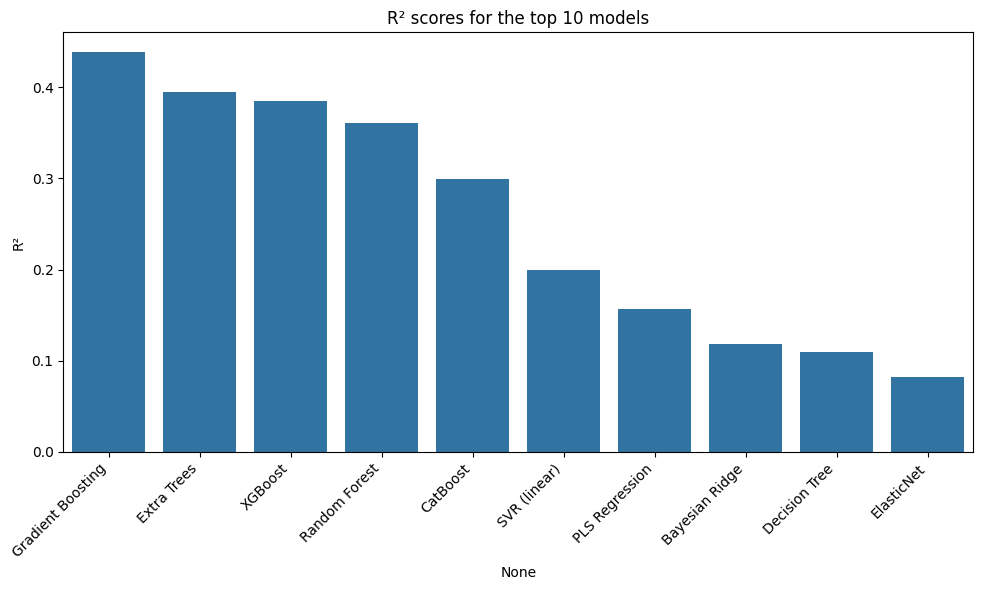

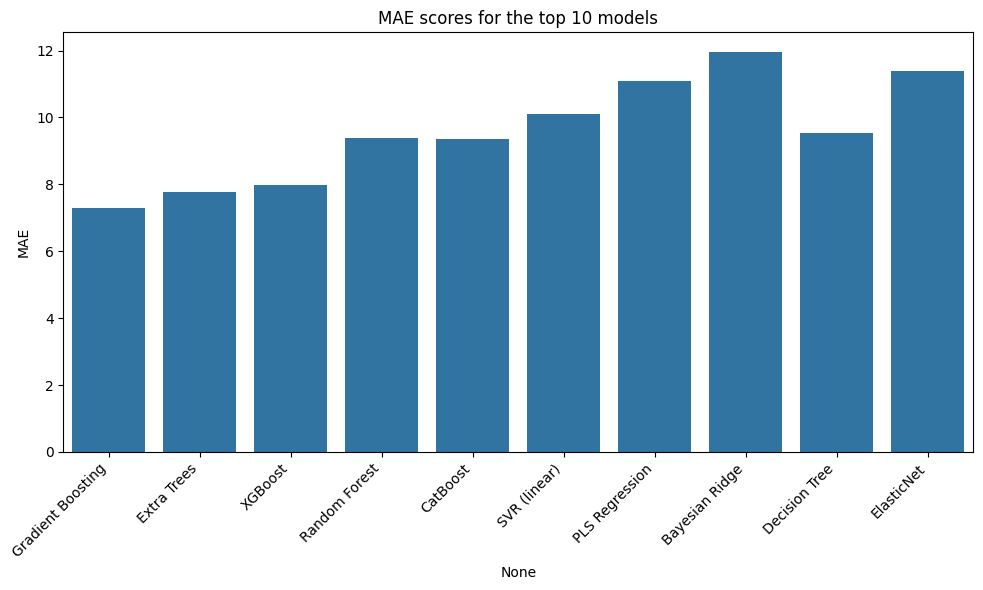

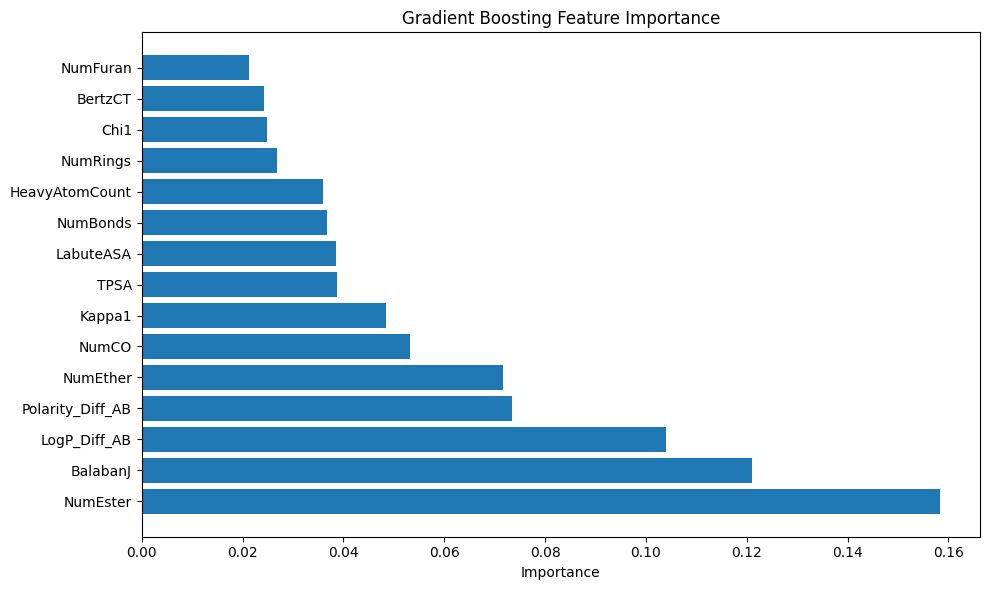

In [5]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.cross_decomposition import PLSRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Ignore specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="[LightGBM]")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Read enhanced feature file
print("Reading feature file...")
df = pd.read_csv('polymer_features_enhanced.csv') 
# df = pd.read_csv('final_training_data-45points.csv') #Second round

# Data processing
print("Processing data...")
# Remove No column
if 'No' in df.columns:
    df = df.drop('No', axis=1)

# Separate features and target variable
X = df.drop('Mpa', axis=1)
y = df['Mpa']

# Check and handle missing values
if X.isnull().sum().sum() > 0:
    print(f"Found {X.isnull().sum().sum()} missing values, processing...")
    X = X.fillna(X.median())

# Feature selection: remove features with low variance
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.005)
X_var_selected = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()]
X = X[selected_features]
print(f"Retained {X.shape[1]} features after feature selection")

# Feature standardization
scaler = RobustScaler()  # Use RobustScaler for better handling of outliers
X_scaled = scaler.fit_transform(X)

# Define 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define evaluation metrics
scoring = {'r2': 'r2', 'neg_mean_absolute_error': 'neg_mean_absolute_error',
           'neg_mean_squared_error': 'neg_mean_squared_error'}

# Define all regression models to test
models = {
    # Linear models
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    'Kernel Ridge': KernelRidge(alpha=0.1, kernel='linear'),
    'PLS Regression': PLSRegression(n_components=2),
    
    # Tree models
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=3),
    
    # Other classic models
    'SVR (linear)': SVR(kernel='linear', C=1.0),
    'SVR (rbf)': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    
    # Neural networks
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000),
    
    # Advanced gradient boosting frameworks
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, verbose=-1),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=False)
}

# Add Gaussian Process Regressors
kernels = {
    'RBF': RBF(),
    'Matern': Matern(),
    'RationalQuadratic': RationalQuadratic()
}

for kernel_name, kernel in kernels.items():
    models[f'Gaussian Process ({kernel_name})'] = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=0)

# Perform cross-validation
print("Starting 5-fold cross-validation to evaluate models...")
results = {}

for name, model in models.items():
    print(f"Evaluating: {name}")
    try:
        # Control the output for models like LightGBM and CatBoost
        old_stdout = None
        if name in ["LightGBM", "CatBoost"]:
            import sys, os
            old_stdout = sys.stdout
            sys.stdout = open(os.devnull, 'w')
        
        # Execute cross-validation
        cv_results = cross_validate(model, X_scaled, y, cv=kfold, scoring=scoring)
        
        # Restore standard output
        if old_stdout:
            sys.stdout.close()
            sys.stdout = old_stdout
        
        # Calculate means and standard deviations
        r2_mean = cv_results['test_r2'].mean()
        r2_std = cv_results['test_r2'].std()
        mae_mean = -cv_results['test_neg_mean_absolute_error'].mean()
        mae_std = cv_results['test_neg_mean_absolute_error'].std()
        mse_mean = -cv_results['test_neg_mean_squared_error'].mean()
        mse_std = cv_results['test_neg_mean_squared_error'].std()
        rmse_mean = np.sqrt(mse_mean)
        
        # Save results
        results[name] = {
            'R²': r2_mean,
            'R² Std': r2_std,
            'MAE': mae_mean,
            'MAE Std': mae_std,
            'MSE': mse_mean,
            'MSE Std': mse_std,
            'RMSE': rmse_mean
        }
    except Exception as e:
        print(f"Error evaluating model {name}: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R²', ascending=False)

# Display performance of all models
print("\nCross-validation performance of all models (sorted by R² descending):")
print(results_df[['R²', 'MAE', 'RMSE']])

# Display detailed results for the top three models
print("\nDetailed results for the top three models:")
print(results_df.head(3))

# Visualize R² for the top 10 models
plt.figure(figsize=(10, 6))
top10_models = results_df.head(10)
sns.barplot(x=top10_models.index, y=top10_models['R²'])
plt.xticks(rotation=45, ha='right')
plt.title('R² scores for the top 10 models')
plt.tight_layout()
plt.savefig('top10_models_r2.png')

# Visualize MAE for the top 10 models
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_models.index, y=top10_models['MAE'])
plt.xticks(rotation=45, ha='right')
plt.title('MAE scores for the top 10 models')
plt.tight_layout()
plt.savefig('top10_models_mae.png')

# Train the best model and examine feature importance (if supported)
best_model_name = results_df.index[0]
best_model = models[best_model_name]

print(f"\nTraining the best model using the complete dataset: {best_model_name}")
best_model.fit(X_scaled, y)

# Try to get and display feature importance (if the model supports it)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print("\nThe 10 most important features:")
    feature_names = list(X.columns)
    for i in range(min(10, len(indices))):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    top_features = 15
    top_indices = indices[:top_features]
    top_importances = importances[top_indices]
    top_names = [feature_names[i] for i in top_indices]
    
    plt.barh(range(len(top_names)), top_importances, align='center')
    plt.yticks(range(len(top_names)), top_names)
    plt.title(f'{best_model_name} Feature Importance')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')

# Save results to CSV
results_df.to_csv('model_evaluation_results.csv')
print("\nAll evaluation results have been saved to 'model_evaluation_results.csv'")
print("Visualizations have been saved as PNG files")

# Output final conclusion
print("\n=== Model Evaluation Summary ===")
print(f"Best model: {best_model_name}")
print(f"R²: {results_df.iloc[0]['R²']:.4f} ± {results_df.iloc[0]['R² Std']:.4f}")
print(f"MAE: {results_df.iloc[0]['MAE']:.4f} ± {results_df.iloc[0]['MAE Std']:.4f}")
print(f"RMSE: {results_df.iloc[0]['RMSE']:.4f}")

Hyperparameter optimization 1

Reading feature file...
Processing data...
After feature selection, 39 features retained

============ Starting Hyperparameter Optimization ============

Starting Extra Trees Hyperparameter Optimization
Performing random search...
Fitting 7 folds for each of 30 candidates, totalling 210 fits
Best Extra Trees random search parameters: {'bootstrap': True, 'ccp_alpha': 0.005026790232288615, 'max_depth': 26, 'max_features': 0.5, 'max_samples': 0.6725356240133415, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 102}
Best R² score: 0.3303
Performing grid search fine-tuning...
Fitting 7 folds for each of 729 candidates, totalling 5103 fits
Best Extra Trees grid search parameters: {'bootstrap': True, 'ccp_alpha': 0.007026790232288615, 'max_depth': 24, 'max_features': 0.5, 'max_samples': 0.7725356240133415, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 52}
Best R² score: 0.3843

Evaluating model: Extra Trees (Optimized)
R²: 0.3843 ± 0.1923
MAE: 9.5671 ± 2.6323
RM

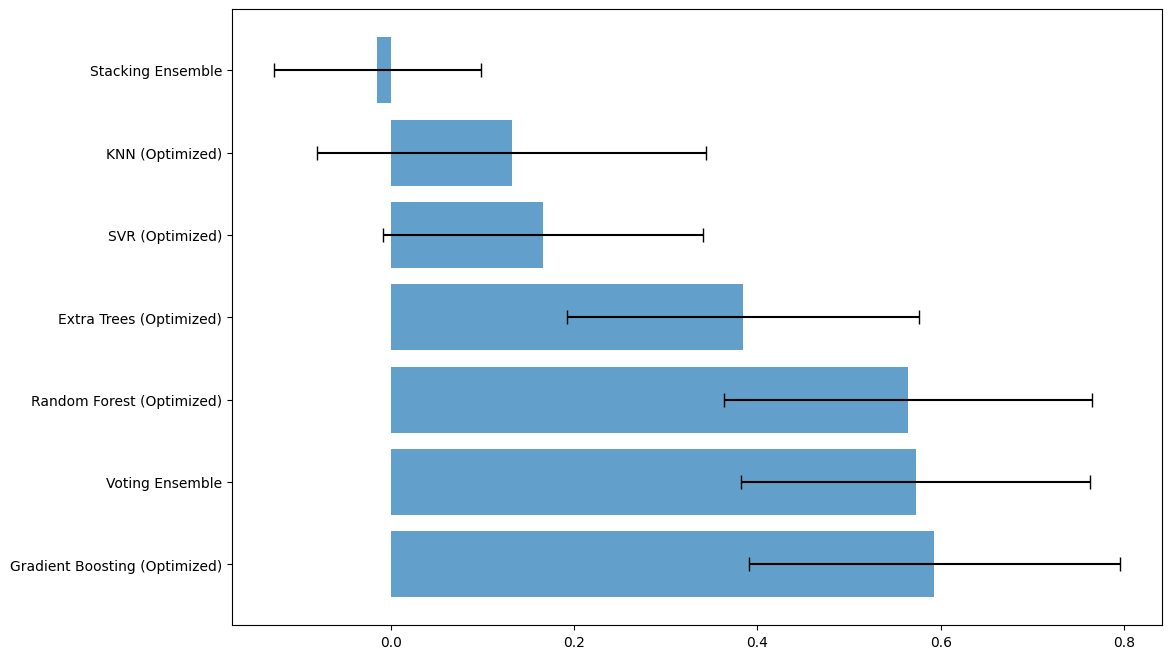

In [11]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import VarianceThreshold
import time
from scipy.stats import randint, uniform
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.exceptions import FitFailedWarning

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="[LightGBM]")
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Read feature file
print("Reading feature file...")
df = pd.read_csv('polymer_features_enhanced.csv')

# Data processing
print("Processing data...")
# Remove No column
if 'No' in df.columns:
    df = df.drop('No', axis=1)

# Separate features and target variable
X = df.drop('Mpa', axis=1)
y = df['Mpa']

# Check and handle missing values
if X.isnull().sum().sum() > 0:
    print(f"Found {X.isnull().sum().sum()} missing values, processing...")
    X = X.fillna(X.median())

# Feature selection: remove features with low variance
selector = VarianceThreshold(threshold=0.005)
X_var_selected = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()]
X = X[selected_features]
print(f"After feature selection, {X.shape[1]} features retained")

# Feature standardization
scaler = RobustScaler()  # Using RobustScaler for better handling of outliers
X_scaled = scaler.fit_transform(X)

# Define 7-fold cross-validation
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

# Define scoring metrics
r2_scorer = make_scorer(r2_score)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Define evaluation function to print detailed cross-validation results
def evaluate_model(model, X, y, kfold, model_name):
    print(f"\nEvaluating model: {model_name}")
    start_time = time.time()
    
    # Calculate R²
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()
    
    # Calculate MAE
    mae_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    mae_mean = -mae_scores.mean()
    mae_std = mae_scores.std()
    
    # Calculate RMSE
    rmse_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rmse_mean = np.sqrt(-rmse_scores.mean())
    rmse_std = np.sqrt(rmse_scores.std())
    
    end_time = time.time()
    
    print(f"R²: {r2_mean:.4f} ± {r2_std:.4f}")
    print(f"MAE: {mae_mean:.4f} ± {mae_std:.4f}")
    print(f"RMSE: {rmse_mean:.4f} ± {rmse_std:.4f}")
    print(f"Evaluation time: {end_time - start_time:.2f} seconds")
    
    return {
        'R²': r2_mean,
        'R² Std': r2_std,
        'MAE': mae_mean,
        'MAE Std': mae_std,
        'RMSE': rmse_mean,
        'RMSE Std': rmse_std
    }

# Custom parameter generation function
def generate_et_params():
    """Generate Extra Trees parameters, ensuring bootstrap and max_samples compatibility"""
    params = {
        'n_estimators': randint(50, 500),
        'max_depth': randint(5, 30),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],
        'ccp_alpha': uniform(0, 0.01)
    }
    
    # Randomly select bootstrap value
    bootstrap_value = np.random.choice([True, False])
    
    # Decide whether to include max_samples based on bootstrap value
    if bootstrap_value:
        params['bootstrap'] = [True]
        params['max_samples'] = uniform(0.5, 0.5)
    else:
        params['bootstrap'] = [False]
        params['max_samples'] = [None]
        
    return params

def generate_rf_params():
    """Generate Random Forest parameters, ensuring bootstrap and max_samples compatibility"""
    params = {
        'n_estimators': randint(50, 500),
        'max_depth': randint(5, 30),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],
        'ccp_alpha': uniform(0, 0.01)
    }
    
    # Randomly select bootstrap value
    bootstrap_value = np.random.choice([True, False])
    
    # Decide whether to include max_samples based on bootstrap value
    if bootstrap_value:
        params['bootstrap'] = [True]
        params['max_samples'] = uniform(0.5, 0.5)
    else:
        params['bootstrap'] = [False]
        params['max_samples'] = [None]
        
    return params

def create_grid_search_params(best_params, model_type):
    """Create grid search parameters based on the best parameters from random search, handling special parameter relationships"""
    grid_params = {}
    
    # Regular parameters
    if 'n_estimators' in best_params:
        grid_params['n_estimators'] = [max(50, best_params['n_estimators'] - 50), 
                                      best_params['n_estimators'], 
                                      min(500, best_params['n_estimators'] + 50)]
    
    if 'max_depth' in best_params:
        grid_params['max_depth'] = [max(5, best_params['max_depth'] - 2), 
                                   best_params['max_depth'], 
                                   min(30, best_params['max_depth'] + 2)]
    
    if 'min_samples_split' in best_params:
        grid_params['min_samples_split'] = [max(2, best_params['min_samples_split'] - 2), 
                                          best_params['min_samples_split'], 
                                          min(20, best_params['min_samples_split'] + 2)]
    
    if 'min_samples_leaf' in best_params:
        grid_params['min_samples_leaf'] = [max(1, best_params['min_samples_leaf'] - 2), 
                                         best_params['min_samples_leaf'], 
                                         min(20, best_params['min_samples_leaf'] + 2)]
    
    if 'max_features' in best_params:
        grid_params['max_features'] = [best_params['max_features']]
    
    if 'ccp_alpha' in best_params:
        grid_params['ccp_alpha'] = [max(0, best_params['ccp_alpha'] - 0.002), 
                                   best_params['ccp_alpha'], 
                                   min(0.01, best_params['ccp_alpha'] + 0.002)]
    
    # Handle special parameter relationships - bootstrap and max_samples
    if model_type in ['et', 'rf']:
        if 'bootstrap' in best_params:
            grid_params['bootstrap'] = [best_params['bootstrap']]
            
            # Include max_samples only when bootstrap is True
            if best_params['bootstrap'] and 'max_samples' in best_params:
                grid_params['max_samples'] = [max(0.1, best_params['max_samples'] - 0.1), 
                                             best_params['max_samples'], 
                                             min(1.0, best_params['max_samples'] + 0.1)]
    
    # GradientBoosting specific parameters
    if model_type == 'gb':
        if 'learning_rate' in best_params:
            grid_params['learning_rate'] = [max(0.01, best_params['learning_rate'] - 0.02), 
                                          best_params['learning_rate'], 
                                          min(0.3, best_params['learning_rate'] + 0.02)]
        
        if 'subsample' in best_params:
            grid_params['subsample'] = [max(0.5, best_params['subsample'] - 0.1), 
                                      best_params['subsample'], 
                                      min(1.0, best_params['subsample'] + 0.1)]
        
        if 'alpha' in best_params:
            grid_params['alpha'] = [max(0.1, best_params['alpha'] - 0.1), 
                                  best_params['alpha'], 
                                  min(1.0, best_params['alpha'] + 0.1)]
    
    return grid_params

print("\n============ Starting Hyperparameter Optimization ============")

# Record optimization results
optimization_results = {}
best_parameters = {}

#--------------------- Extra Trees Optimization ---------------------
print("\n==========================================")
print("Starting Extra Trees Hyperparameter Optimization")
print("==========================================")

# Use custom parameter generation function for random search
et_param_dist = generate_et_params()

et_random = RandomizedSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_distributions=et_param_dist,
    n_iter=30,
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Performing random search...")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)
    try:
        et_random.fit(X_scaled, y)
        print(f"Best Extra Trees random search parameters: {et_random.best_params_}")
        print(f"Best R² score: {et_random.best_score_:.4f}")
        
        # Second phase: Fine-tuning based on random search results
        et_best_params = et_random.best_params_
        et_param_grid = create_grid_search_params(et_best_params, 'et')
        
        et_grid = GridSearchCV(
            ExtraTreesRegressor(random_state=42),
            param_grid=et_param_grid,
            cv=kfold,
            scoring='r2',
            n_jobs=-1,
            verbose=1
        )
        
        print("Performing grid search fine-tuning...")
        et_grid.fit(X_scaled, y)
        print(f"Best Extra Trees grid search parameters: {et_grid.best_params_}")
        print(f"Best R² score: {et_grid.best_score_:.4f}")
        
        # Final evaluation
        best_et = ExtraTreesRegressor(**et_grid.best_params_, random_state=42)
        et_results = evaluate_model(best_et, X_scaled, y, kfold, "Extra Trees (Optimized)")
        
        # Save results
        optimization_results['Extra Trees (Optimized)'] = et_results
        best_parameters['Extra Trees (Optimized)'] = et_grid.best_params_
        
        # Check feature importance
        best_et.fit(X_scaled, y)
        et_importance = best_et.feature_importances_
        et_indices = np.argsort(et_importance)[::-1]
        feature_names = list(X.columns)
        print("\nExtra Trees top 10 most important features:")
        for i in range(min(10, len(et_indices))):
            print(f"{feature_names[et_indices[i]]}: {et_importance[et_indices[i]]:.4f}")
            
    except Exception as e:
        print(f"Extra Trees optimization error: {e}")
        print("Skipping Extra Trees model and continuing...")

#--------------------- Gradient Boosting Optimization ---------------------
print("\n==========================================")
print("Starting Gradient Boosting Hyperparameter Optimization")
print("==========================================")

# Gradient Boosting parameter distribution
gb_param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.5, 0.5),
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],
    'alpha': uniform(0.1, 0.9)
}

gb_random = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_dist,
    n_iter=30,
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Performing random search...")
try:
    gb_random.fit(X_scaled, y)
    print(f"Best Gradient Boosting random search parameters: {gb_random.best_params_}")
    print(f"Best R² score: {gb_random.best_score_:.4f}")
    
    # Second phase: Fine-tuning based on random search results
    gb_best_params = gb_random.best_params_
    gb_param_grid = create_grid_search_params(gb_best_params, 'gb')
    
    gb_grid = GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        param_grid=gb_param_grid,
        cv=kfold,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    print("Performing grid search fine-tuning...")
    gb_grid.fit(X_scaled, y)
    print(f"Best Gradient Boosting grid search parameters: {gb_grid.best_params_}")
    print(f"Best R² score: {gb_grid.best_score_:.4f}")
    
    # Final evaluation
    best_gb = GradientBoostingRegressor(**gb_grid.best_params_, random_state=42)
    gb_results = evaluate_model(best_gb, X_scaled, y, kfold, "Gradient Boosting (Optimized)")
    
    # Save results
    optimization_results['Gradient Boosting (Optimized)'] = gb_results
    best_parameters['Gradient Boosting (Optimized)'] = gb_grid.best_params_
    
    # Check feature importance
    best_gb.fit(X_scaled, y)
    gb_importance = best_gb.feature_importances_
    gb_indices = np.argsort(gb_importance)[::-1]
    print("\nGradient Boosting top 10 most important features:")
    for i in range(min(10, len(gb_indices))):
        print(f"{feature_names[gb_indices[i]]}: {gb_importance[gb_indices[i]]:.4f}")
        
except Exception as e:
    print(f"Gradient Boosting optimization error: {e}")
    print("Skipping Gradient Boosting model and continuing...")

#--------------------- Random Forest Optimization ---------------------
print("\n==========================================")
print("Starting Random Forest Hyperparameter Optimization")
print("==========================================")

# Use custom parameter generation function
rf_param_dist = generate_rf_params()

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=30,
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Performing random search...")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)
    try:
        rf_random.fit(X_scaled, y)
        print(f"Best Random Forest random search parameters: {rf_random.best_params_}")
        print(f"Best R² score: {rf_random.best_score_:.4f}")
        
        # Second phase: Fine-tuning based on random search results
        rf_best_params = rf_random.best_params_
        rf_param_grid = create_grid_search_params(rf_best_params, 'rf')
        
        rf_grid = GridSearchCV(
            RandomForestRegressor(random_state=42),
            param_grid=rf_param_grid,
            cv=kfold,
            scoring='r2',
            n_jobs=-1,
            verbose=1
        )
        
        print("Performing grid search fine-tuning...")
        rf_grid.fit(X_scaled, y)
        print(f"Best Random Forest grid search parameters: {rf_grid.best_params_}")
        print(f"Best R² score: {rf_grid.best_score_:.4f}")
        
        # Final evaluation
        best_rf = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
        rf_results = evaluate_model(best_rf, X_scaled, y, kfold, "Random Forest (Optimized)")
        
        # Save results
        optimization_results['Random Forest (Optimized)'] = rf_results
        best_parameters['Random Forest (Optimized)'] = rf_grid.best_params_
        
        # Check feature importance
        best_rf.fit(X_scaled, y)
        rf_importance = best_rf.feature_importances_
        rf_indices = np.argsort(rf_importance)[::-1]
        print("\nRandom Forest top 10 most important features:")
        for i in range(min(10, len(rf_indices))):
            print(f"{feature_names[rf_indices[i]]}: {rf_importance[rf_indices[i]]:.4f}")
            
    except Exception as e:
        print(f"Random Forest optimization error: {e}")
        print("Skipping Random Forest model and continuing...")

#--------------------- Results Summary ---------------------
print("\n==========================================")
print("Hyperparameter Optimization Results Summary")
print("==========================================")

# Check if any models were successfully trained
if len(optimization_results) > 0:
    # Convert results to DataFrame
    results_df = pd.DataFrame(optimization_results).T
    # Sort and display results
    results_df = results_df.sort_values('R²', ascending=False)
    print("\nOptimized model cross-validation performance (sorted by R² descending):")
    print(results_df[['R²', 'R² Std', 'MAE', 'MAE Std', 'RMSE', 'RMSE Std']])
    
    # Best model details
    best_model_name = results_df.index[0]
    print(f"\nBest optimized model: {best_model_name}")
    print(f"R²: {results_df.loc[best_model_name, 'R²']:.4f} ± {results_df.loc[best_model_name, 'R² Std']:.4f}")
    print(f"MAE: {results_df.loc[best_model_name, 'MAE']:.4f} ± {results_df.loc[best_model_name, 'MAE Std']:.4f}")
    print(f"RMSE: {results_df.loc[best_model_name, 'RMSE']:.4f} ± {results_df.loc[best_model_name, 'RMSE Std']:.4f}")
    print(f"\nBest parameters: {best_parameters[best_model_name]}")
    
    # Save best model parameters
    best_params_df = pd.DataFrame(best_parameters)
    best_params_df.to_csv('best_parameters.csv')
    print("\nBest parameters saved to 'best_parameters.csv'")
else:
    print("No models successfully completed training and optimization.")

# Try adding SVM and KNN models
print("\n==========================================")
print("Evaluating Additional Model Types")
print("==========================================")

# SVM model
print("\nEvaluating SVR model...")
svr_param_dist = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'] + list(uniform(0.01, 1).rvs(5)),
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': uniform(0.01, 0.5)
}

try:
    svr_random = RandomizedSearchCV(
        SVR(),
        param_distributions=svr_param_dist,
        n_iter=20,
        cv=kfold,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    svr_random.fit(X_scaled, y)
    print(f"Best SVR parameters: {svr_random.best_params_}")
    print(f"Best R² score: {svr_random.best_score_:.4f}")
    
    best_svr = SVR(**svr_random.best_params_)
    svr_results = evaluate_model(best_svr, X_scaled, y, kfold, "SVR (Optimized)")
    optimization_results['SVR (Optimized)'] = svr_results
    best_parameters['SVR (Optimized)'] = svr_random.best_params_
except Exception as e:
    print(f"SVR optimization error: {e}")
    print("Skipping SVR model and continuing...")

# KNN model
print("\nEvaluating KNN model...")
knn_param_dist = {
    'n_neighbors': randint(3, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

try:
    knn_random = RandomizedSearchCV(
        KNeighborsRegressor(),
        param_distributions=knn_param_dist,
        n_iter=20,
        cv=kfold,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    knn_random.fit(X_scaled, y)
    print(f"Best KNN parameters: {knn_random.best_params_}")
    print(f"Best R² score: {knn_random.best_score_:.4f}")
    
    best_knn = KNeighborsRegressor(**knn_random.best_params_)
    knn_results = evaluate_model(best_knn, X_scaled, y, kfold, "KNN (Optimized)")
    optimization_results['KNN (Optimized)'] = knn_results
    best_parameters['KNN (Optimized)'] = knn_random.best_params_
except Exception as e:
    print(f"KNN optimization error: {e}")
    print("Skipping KNN model and continuing...")

# Update results DataFrame
if len(optimization_results) > 0:
    results_df = pd.DataFrame(optimization_results).T
    results_df = results_df.sort_values('R²', ascending=False)
    print("\nCross-validation performance for all models (sorted by R² descending):")
    print(results_df[['R²', 'R² Std', 'MAE', 'MAE Std', 'RMSE', 'RMSE Std']])
    
    # Update best model
    best_model_name = results_df.index[0]
    print(f"\nBest model: {best_model_name}")
    print(f"R²: {results_df.loc[best_model_name, 'R²']:.4f} ± {results_df.loc[best_model_name, 'R² Std']:.4f}")
    print(f"MAE: {results_df.loc[best_model_name, 'MAE']:.4f} ± {results_df.loc[best_model_name, 'MAE Std']:.4f}")
    print(f"RMSE: {results_df.loc[best_model_name, 'RMSE']:.4f} ± {results_df.loc[best_model_name, 'RMSE Std']:.4f}")
    
    # Create enhanced ensemble models
    print("\n==========================================")
    print("Training Enhanced Fusion Models")
    print("==========================================")
    
    # Select top three models or all available models
    top_models = results_df.index[:min(3, len(results_df))].tolist()
    print(f"The following models will be used for ensemble: {top_models}")
    
    # Create corresponding model instances
    model_instances = []
    for model_name in top_models:
        if 'Extra Trees' in model_name and 'Extra Trees (Optimized)' in best_parameters:
            model_instances.append(('et', ExtraTreesRegressor(**best_parameters['Extra Trees (Optimized)'], random_state=42)))
        elif 'Gradient Boosting' in model_name and 'Gradient Boosting (Optimized)' in best_parameters:
            model_instances.append(('gb', GradientBoostingRegressor(**best_parameters['Gradient Boosting (Optimized)'], random_state=42)))
        elif 'Random Forest' in model_name and 'Random Forest (Optimized)' in best_parameters:
            model_instances.append(('rf', RandomForestRegressor(**best_parameters['Random Forest (Optimized)'], random_state=42)))
        elif 'SVR' in model_name and 'SVR (Optimized)' in best_parameters:
            model_instances.append(('svr', SVR(**best_parameters['SVR (Optimized)'])))
        elif 'KNN' in model_name and 'KNN (Optimized)' in best_parameters:
            model_instances.append(('knn', KNeighborsRegressor(**best_parameters['KNN (Optimized)'])))
    
    if len(model_instances) >= 2:  # Need at least two models to create an ensemble
        try:
            # Create Voting ensemble model
            voting_regressor = VotingRegressor(estimators=model_instances)
            voting_results = evaluate_model(voting_regressor, X_scaled, y, kfold, "Voting Ensemble")
            optimization_results['Voting Ensemble'] = voting_results
            
            # Create Stacking ensemble model
            stacking_regressor = StackingRegressor(
                estimators=model_instances,
                final_estimator=LassoCV(cv=5),
                cv=5
            )
            stacking_results = evaluate_model(stacking_regressor, X_scaled, y, kfold, "Stacking Ensemble")
            optimization_results['Stacking Ensemble'] = stacking_results
            
            # Update results DataFrame
            results_df = pd.DataFrame(optimization_results).T
            results_df = results_df.sort_values('R²', ascending=False)
        except Exception as e:
            print(f"Ensemble model creation error: {e}")
            print("Skipping ensemble models...")
    else:
        print("Not enough models to create ensemble models")
    
    # Sort and display final results
    print("\nFinal cross-validation performance for all models (sorted by R² descending):")
    print(results_df[['R²', 'R² Std', 'MAE', 'MAE Std', 'RMSE', 'RMSE Std']])
    
    # Save results to CSV
    results_df.to_csv('final_model_evaluation_results.csv')
    print("\nAll final results saved to 'final_model_evaluation_results.csv'")
    
    # Plot model performance comparison
    plt.figure(figsize=(12, 8))
    models = results_df.index
    x = np.arange(len(models))
    
    plt.barh(x, results_df['R²'], xerr=results_df['R² Std'], alpha=0.7, capsize=5)
    plt.yticks(x, models)
    plt.xlabel

Hyperparameter optimization 2

Reading feature files...
Successfully read the original feature file
Processing data...
After feature selection, 39 features were retained

Baseline Model Evaluation

Evaluating model: Extra Trees (Baseline)
R²: 0.5723 ± 0.2017
MAE: 7.1481 ± 2.9319
MSE: 110.7922 ± 89.3452
RMSE: 10.5258
Evaluation time: 2.69 seconds

Evaluating model: Gradient Boosting (Baseline)
R²: 0.5726 ± 0.1855
MAE: 7.1076 ± 2.7832
MSE: 109.7750 ± 82.6844
RMSE: 10.4774
Evaluation time: 1.78 seconds

Evaluating model: Random Forest (Baseline)
R²: 0.4648 ± 0.2030
MAE: 8.9170 ± 2.9870
MSE: 133.3813 ± 90.6725
RMSE: 11.5491
Evaluation time: 3.45 seconds

============ Starting Hyperparameter Optimization ============

Starting Extra Trees Hyperparameter Optimization
Performing random search...
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Best Extra Trees random search parameters: {'bootstrap': False, 'ccp_alpha': 0.01, 'max_depth': 46, 'max_features': 0.9, 'max_samples': None, 'min_samples_leaf': 1, 'min

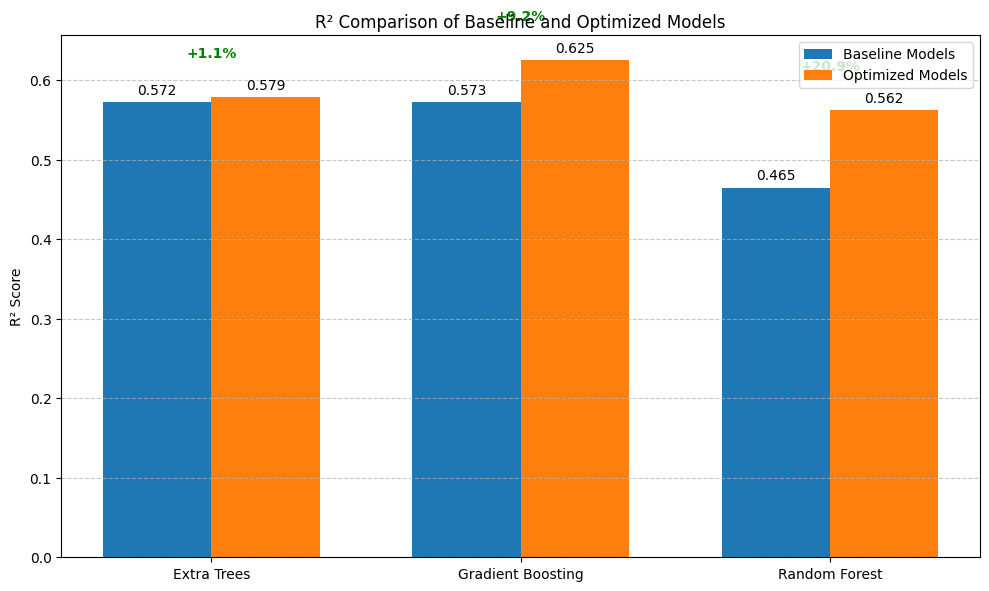


Performance Change Summary
Extra Trees: 0.5723 -> 0.5788 (+1.14%) - Improvement
Gradient Boosting: 0.5726 -> 0.6253 (+9.19%) - Improvement
Random Forest: 0.4648 -> 0.5621 (+20.92%) - Improvement


In [13]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import VarianceThreshold
import time
from scipy.stats import randint, uniform

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="[LightGBM]")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Ensure using the same dataset as before
print("Reading feature files...")
try:
    # Try to read the original feature file
    df = pd.read_csv('polymer_features_enhanced.csv')
    print("Successfully read the original feature file")
except:
    try:
        # If the original file doesn't exist, try using a new file
        df = pd.read_csv('polymer_descriptors_20.csv')
        print("Using newly generated descriptor file")
    except Exception as e:
        print(f"Unable to read feature file: {str(e)}")
        exit(1)

# Data processing
print("Processing data...")
# Remove No column
if 'No' in df.columns:
    df = df.drop('No', axis=1)

# Separate features and target variable
X = df.drop('Mpa', axis=1)
y = df['Mpa']

# Check and handle missing values
if X.isnull().sum().sum() > 0:
    print(f"Found {X.isnull().sum().sum()} missing values, processing...")
    X = X.fillna(X.median())

# Feature selection: delete features with low variance
selector = VarianceThreshold(threshold=0.005)
X_var_selected = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()]
X = X[selected_features]
print(f"After feature selection, {X.shape[1]} features were retained")

# Feature standardization
scaler = RobustScaler()  # Use RobustScaler for better handling of outliers
X_scaled = scaler.fit_transform(X)

# Cross-validation settings
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

# Define scoring metrics
r2_scorer = make_scorer(r2_score)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Define evaluation function, print detailed cross-validation results
def evaluate_model(model, X, y, kfold, model_name):
    print(f"\nEvaluating model: {model_name}")
    start_time = time.time()
    
    # Calculate R²
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()
    
    # Calculate MAE
    mae_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    mae_mean = -mae_scores.mean()
    mae_std = mae_scores.std()
    
    # Calculate MSE
    mse_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mse_mean = -mse_scores.mean()
    mse_std = mse_scores.std()
    
    # Calculate RMSE
    rmse_mean = np.sqrt(mse_mean)
    
    end_time = time.time()
    
    print(f"R²: {r2_mean:.4f} ± {r2_std:.4f}")
    print(f"MAE: {mae_mean:.4f} ± {mae_std:.4f}")
    print(f"MSE: {mse_mean:.4f} ± {mse_std:.4f}")
    print(f"RMSE: {rmse_mean:.4f}")
    print(f"Evaluation time: {end_time - start_time:.2f} seconds")
    
    return {
        'R²': r2_mean,
        'R² Std': r2_std,
        'MAE': mae_mean,
        'MAE Std': mae_std,
        'MSE': mse_mean,
        'MSE Std': mse_std,
        'RMSE': rmse_mean
    }

# First evaluate unoptimized baseline models
print("\n==========================================")
print("Baseline Model Evaluation")
print("==========================================")

# Extra Trees baseline
et_base = ExtraTreesRegressor(random_state=42)
et_base_results = evaluate_model(et_base, X_scaled, y, kfold, "Extra Trees (Baseline)")

# Gradient Boosting baseline
gb_base = GradientBoostingRegressor(random_state=42)
gb_base_results = evaluate_model(gb_base, X_scaled, y, kfold, "Gradient Boosting (Baseline)")

# Random Forest baseline
rf_base = RandomForestRegressor(random_state=42)
rf_base_results = evaluate_model(rf_base, X_scaled, y, kfold, "Random Forest (Baseline)")

# Record baseline results
baseline_results = {
    'Extra Trees (Baseline)': et_base_results,
    'Gradient Boosting (Baseline)': gb_base_results,
    'Random Forest (Baseline)': rf_base_results
}

print("\n============ Starting Hyperparameter Optimization ============")

# Record optimization results and parameters
optimization_results = {}
best_parameters = {}

#--------------------- Extra Trees Optimization ---------------------
print("\n==========================================")
print("Starting Extra Trees Hyperparameter Optimization")
print("==========================================")

# Based on baseline performance, set parameter ranges - use a wider search space
et_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(10, 50).rvs(10)),  # Include unlimited depth
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7, 0.9],  # Include more proportion options
    'bootstrap': [True, False],
    'max_samples': [None, 0.5, 0.7, 0.9] if True else [None],
    'ccp_alpha': [0, 0.001, 0.01]
}

et_random = RandomizedSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_distributions=et_param_dist,
    n_iter=50,  # Increase iteration count for wider exploration
    cv=kfold,  # Ensure same cross-validation settings as original evaluation
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Performing random search...")
et_random.fit(X_scaled, y)
print(f"Best Extra Trees random search parameters: {et_random.best_params_}")
print(f"Best R² score: {et_random.best_score_:.4f}")

# Use a finer grid search for tuning
et_best_params = et_random.best_params_

# Prepare grid search parameters - finer grid
et_param_grid = {}
for param, value in et_best_params.items():
    if param == 'n_estimators':
        et_param_grid[param] = [max(100, value - 100), value, min(1000, value + 100)]
    elif param == 'max_depth' and value is not None:
        et_param_grid[param] = [max(5, value - 5), value, min(100, value + 5)]
    elif param == 'min_samples_split':
        et_param_grid[param] = [max(2, value - 2), value, min(30, value + 2)]
    elif param == 'min_samples_leaf':
        et_param_grid[param] = [max(1, value - 1), value, min(30, value + 1)]
    elif param == 'max_features' and isinstance(value, float):
        et_param_grid[param] = [max(0.1, value - 0.1), value, min(1.0, value + 0.1)]
    else:
        et_param_grid[param] = [value]

et_grid = GridSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_grid=et_param_grid,
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Performing grid search fine-tuning...")
et_grid.fit(X_scaled, y)
print(f"Best Extra Trees grid search parameters: {et_grid.best_params_}")
print(f"Best R² score: {et_grid.best_score_:.4f}")

# Final evaluation
best_et = ExtraTreesRegressor(**et_grid.best_params_, random_state=42)
et_results = evaluate_model(best_et, X_scaled, y, kfold, "Extra Trees (Optimized)")

# Save results and parameters
optimization_results['Extra Trees (Optimized)'] = et_results
best_parameters['Extra Trees (Optimized)'] = et_grid.best_params_

# If optimized performance is worse than default performance, try falling back to fine-tuning based on default parameters
if et_results['R²'] < et_base_results['R²']:
    print("\nOptimized performance decreased, trying fine-tuning based on default parameters...")
    
    # Get default parameters
    default_et = ExtraTreesRegressor()
    default_params = default_et.get_params()
    
    # Create a narrower search space based on default parameters
    et_default_grid = {
        'n_estimators': [50, 100, 150, 200],
        'max_features': ['sqrt', 'log2', None],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    et_default_search = GridSearchCV(
        ExtraTreesRegressor(random_state=42),
        param_grid=et_default_grid,
        cv=kfold,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    et_default_search.fit(X_scaled, y)
    print(f"Best configuration based on default parameters: {et_default_search.best_params_}")
    print(f"Best R² score: {et_default_search.best_score_:.4f}")
    
    # Evaluate the model fine-tuned based on default parameters
    best_default_et = ExtraTreesRegressor(**et_default_search.best_params_, random_state=42)
    et_default_results = evaluate_model(best_default_et, X_scaled, y, kfold, "Extra Trees (Default Tuned)")
    
    # Compare and choose the best model
    if et_default_results['R²'] > et_results['R²']:
        print("Fine-tuned model based on default parameters performs better, using this model")
        optimization_results['Extra Trees (Optimized)'] = et_default_results
        best_parameters['Extra Trees (Optimized)'] = et_default_search.best_params_
        best_et = best_default_et

#--------------------- Gradient Boosting Optimization ---------------------
print("\n==========================================")
print("Starting Gradient Boosting Hyperparameter Optimization")
print("==========================================")

# Use a wider parameter range
gb_param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.5, 0.5),
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7, 0.9],
    'alpha': uniform(0.1, 0.9)
}

gb_random = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_dist,
    n_iter=50,
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Performing random search...")
gb_random.fit(X_scaled, y)
print(f"Best Gradient Boosting random search parameters: {gb_random.best_params_}")
print(f"Best R² score: {gb_random.best_score_:.4f}")

# Use a finer grid search for tuning
gb_best_params = gb_random.best_params_

# Prepare grid search parameters - finer grid
gb_param_grid = {}
for param, value in gb_best_params.items():
    if param == 'n_estimators':
        gb_param_grid[param] = [max(50, value - 50), value, min(1000, value + 50)]
    elif param == 'learning_rate':
        gb_param_grid[param] = [max(0.01, value - 0.05), value, min(0.5, value + 0.05)]
    elif param == 'max_depth':
        gb_param_grid[param] = [max(1, value - 2), value, min(30, value + 2)]
    elif param == 'min_samples_split':
        gb_param_grid[param] = [max(2, value - 2), value, min(30, value + 2)]
    elif param == 'min_samples_leaf':
        gb_param_grid[param] = [max(1, value - 1), value, min(30, value + 1)]
    elif param == 'subsample' or param == 'alpha':
        gb_param_grid[param] = [max(0.1, value - 0.1), value, min(1.0, value + 0.1)]
    elif param == 'max_features' and isinstance(value, float):
        gb_param_grid[param] = [max(0.1, value - 0.1), value, min(1.0, value + 0.1)]
    else:
        gb_param_grid[param] = [value]

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=gb_param_grid,
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Performing grid search fine-tuning...")
gb_grid.fit(X_scaled, y)
print(f"Best Gradient Boosting grid search parameters: {gb_grid.best_params_}")
print(f"Best R² score: {gb_grid.best_score_:.4f}")

# Final evaluation
best_gb = GradientBoostingRegressor(**gb_grid.best_params_, random_state=42)
gb_results = evaluate_model(best_gb, X_scaled, y, kfold, "Gradient Boosting (Optimized)")

# Save results
optimization_results['Gradient Boosting (Optimized)'] = gb_results
best_parameters['Gradient Boosting (Optimized)'] = gb_grid.best_params_

# If optimized performance is worse than default performance, try falling back to fine-tuning based on default parameters
if gb_results['R²'] < gb_base_results['R²']:
    print("\nOptimized performance decreased, trying fine-tuning based on default parameters...")
    
    # Get default parameters
    default_gb = GradientBoostingRegressor()
    default_params = default_gb.get_params()
    
    # Create a narrower search space based on default parameters
    gb_default_grid = {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 4, 6],
        'subsample': [0.8, 0.9, 1.0]
    }
    
    gb_default_search = GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        param_grid=gb_default_grid,
        cv=kfold,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    gb_default_search.fit(X_scaled, y)
    print(f"Best configuration based on default parameters: {gb_default_search.best_params_}")
    print(f"Best R² score: {gb_default_search.best_score_:.4f}")
    
    # Evaluate the model fine-tuned based on default parameters
    best_default_gb = GradientBoostingRegressor(**gb_default_search.best_params_, random_state=42)
    gb_default_results = evaluate_model(best_default_gb, X_scaled, y, kfold, "Gradient Boosting (Default Tuned)")
    
    # Compare and choose the best model
    if gb_default_results['R²'] > gb_results['R²']:
        print("Fine-tuned model based on default parameters performs better, using this model")
        optimization_results['Gradient Boosting (Optimized)'] = gb_default_results
        best_parameters['Gradient Boosting (Optimized)'] = gb_default_search.best_params_
        best_gb = best_default_gb

#--------------------- Random Forest Optimization ---------------------
print("\n==========================================")
print("Starting Random Forest Hyperparameter Optimization")
print("==========================================")

# Use a wider parameter range
rf_param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(randint(10, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7, 0.9],
    'bootstrap': [True, False],
    'max_samples': [None, 0.5, 0.7, 0.9] if True else [None],
    'ccp_alpha': [0, 0.001, 0.01]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=50,
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Performing random search...")
rf_random.fit(X_scaled, y)
print(f"Best Random Forest random search parameters: {rf_random.best_params_}")
print(f"Best R² score: {rf_random.best_score_:.4f}")

# Use a finer grid search for tuning
rf_best_params = rf_random.best_params_

# Prepare grid search parameters - finer grid
rf_param_grid = {}
for param, value in rf_best_params.items():
    if param == 'n_estimators':
        rf_param_grid[param] = [max(50, value - 50), value, min(1000, value + 50)]
    elif param == 'max_depth' and value is not None:
        rf_param_grid[param] = [max(5, value - 5), value, min(100, value + 5)]
    elif param == 'min_samples_split':
        rf_param_grid[param] = [max(2, value - 2), value, min(30, value + 2)]
    elif param == 'min_samples_leaf':
        rf_param_grid[param] = [max(1, value - 1), value, min(30, value + 1)]
    elif param == 'max_features' and isinstance(value, float):
        rf_param_grid[param] = [max(0.1, value - 0.1), value, min(1.0, value + 0.1)]
    else:
        rf_param_grid[param] = [value]

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=kfold,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Performing grid search fine-tuning...")
rf_grid.fit(X_scaled, y)
print(f"Best Random Forest grid search parameters: {rf_grid.best_params_}")
print(f"Best R² score: {rf_grid.best_score_:.4f}")

# Final evaluation
best_rf = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
rf_results = evaluate_model(best_rf, X_scaled, y, kfold, "Random Forest (Optimized)")

# Save results
optimization_results['Random Forest (Optimized)'] = rf_results
best_parameters['Random Forest (Optimized)'] = rf_grid.best_params_

# If optimized performance is worse than default performance, try falling back to fine-tuning based on default parameters
if rf_results['R²'] < rf_base_results['R²']:
    print("\nOptimized performance decreased, trying fine-tuning based on default parameters...")
    
    # Get default parameters
    default_rf = RandomForestRegressor()
    default_params = default_rf.get_params()
    
    # Create a narrower search space based on default parameters
    rf_default_grid = {
        'n_estimators': [50, 100, 150, 200],
        'max_features': ['sqrt', 'log2', None],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    rf_default_search = GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid=rf_default_grid,
        cv=kfold,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    rf_default_search.fit(X_scaled, y)
    print(f"Best configuration based on default parameters: {rf_default_search.best_params_}")
    print(f"Best R² score: {rf_default_search.best_score_:.4f}")
    
    # Evaluate the model fine-tuned based on default parameters
    best_default_rf = RandomForestRegressor(**rf_default_search.best_params_, random_state=42)
    rf_default_results = evaluate_model(best_default_rf, X_scaled, y, kfold, "Random Forest (Default Tuned)")
    
    # Compare and choose the best model
    if rf_default_results['R²'] > rf_results['R²']:
        print("Fine-tuned model based on default parameters performs better, using this model")
        optimization_results['Random Forest (Optimized)'] = rf_default_results
        best_parameters['Random Forest (Optimized)'] = rf_default_search.best_params_
        best_rf = best_default_rf

#--------------------- Results Summary ---------------------
print("\n==========================================")
print("Hyperparameter Optimization Results Summary")
print("==========================================")

# Merge baseline and optimization results
all_results = {**baseline_results, **optimization_results}

# Convert results to DataFrame
results_df = pd.DataFrame(all_results).T

# Sort and display results
results_df = results_df.sort_values('R²', ascending=False)
print("\nCross-validation performance of all models (sorted by R² in descending order):")
print(results_df[['R²', 'R² Std', 'MAE', 'MAE Std', 'MSE', 'MSE Std', 'RMSE']])

# Best model details
best_model_name = results_df.index[0]
print(f"\nBest model: {best_model_name}")
print(f"R²: {results_df.loc[best_model_name, 'R²']:.4f} ± {results_df.loc[best_model_name, 'R² Std']:.4f}")
print(f"MAE: {results_df.loc[best_model_name, 'MAE']:.4f} ± {results_df.loc[best_model_name, 'MAE Std']:.4f}")
print(f"RMSE: {results_df.loc[best_model_name, 'RMSE']:.4f}")

# If the best model is an optimized version, display parameters
if 'Optimized' in best_model_name or 'Default Tuned' in best_model_name:
    print(f"\nBest parameters: {best_parameters.get(best_model_name, 'N/A')}")

# Save best model parameters
if best_parameters:
    pd.DataFrame(best_parameters).to_csv('best_parameters.csv')
    print("\nBest parameters have been saved to 'best_parameters.csv'")

# Plot comparison of baseline and optimized models
models = ['Extra Trees', 'Gradient Boosting', 'Random Forest']
baseline_scores = [baseline_results[f"{m} (Baseline)"]['R²'] for m in models]
optimized_scores = [optimization_results[f"{m} (Optimized)"]['R²'] for m in models]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, baseline_scores, width, label='Baseline Models')
plt.bar(x + width/2, optimized_scores, width, label='Optimized Models')

plt.ylabel('R² Score')
plt.title('R² Comparison of Baseline and Optimized Models')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values
for i, (b, o) in enumerate(zip(baseline_scores, optimized_scores)):
    plt.text(i - width/2, b + 0.01, f"{b:.3f}", ha='center')
    plt.text(i + width/2, o + 0.01, f"{o:.3f}", ha='center')
    
    # Display improvement/regression percentage
    change = (o - b) / b * 100
    color = 'green' if change > 0 else 'red'
    plt.text(i, max(b, o) + 0.05, f"{change:+.1f}%", ha='center', color=color, weight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Output summary
print("\n==========================================")
print("Performance Change Summary")
print("==========================================")

for model in models:
    baseline = baseline_results[f"{model} (Baseline)"]['R²']
    optimized = optimization_results[f"{model} (Optimized)"]['R²']
    change = (optimized - baseline) / baseline * 100
    
    status = "Improvement" if change > 0 else "Decrease"
    print(f"{model}: {baseline:.4f} -> {optimized:.4f} ({change:+.2f}%) - {status}")

Model Evaluation

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import os
import time
from datetime import datetime
import shap

# Create results directory
results_dir = f"model_evaluation_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
os.makedirs(results_dir, exist_ok=True)
os.makedirs(os.path.join(results_dir, "plots"), exist_ok=True)

# Set up log file
log_file = os.path.join(results_dir, "evaluation_log.txt")

def log_message(message):
    """Log message to log file and console"""
    print(message)
    with open(log_file, "a") as f:
        f.write(message + "\n")

# Record start time
start_time_total = time.time()
log_message(f"Starting model evaluation - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Specify original dataset directory
original_results_dir = "fixed_split_results_20250424_164733"  # Example path, please replace with actual path
dataset_dir = os.path.join(original_results_dir, "final_dataset")

# Step 1: Read training and test sets
log_message("\nStep 1: Reading datasets...")

try:
    # Read training set
    train_data = pd.read_csv(os.path.join(dataset_dir, "final_training_data.csv"))
    log_message(f"Successfully read training set, shape: {train_data.shape}")
    
    # Read test set
    test_data = pd.read_csv(os.path.join(dataset_dir, "test_data.csv"))
    log_message(f"Successfully read test set, shape: {test_data.shape}")
    
    # Read preprocessing information
    preprocessing_info = joblib.load(os.path.join(dataset_dir, "preprocessing_info.pkl"))
    log_message("Successfully read preprocessing information")
    
except Exception as e:
    log_message(f"Error reading data: {str(e)}")
    exit(1)

# Step 2: Prepare features and target variables
log_message("\nStep 2: Preparing features and target variables...")

# Get feature column names from preprocessing information
if 'selected_features' in preprocessing_info:
    feature_columns = preprocessing_info['selected_features']
    log_message(f"Using feature columns from preprocessing info: {len(feature_columns)} features")
else:
    # If no feature names in preprocessing info, try to infer
    feature_columns = [col for col in train_data.columns 
                      if col not in ['No', 'Index', 'Mpa', 'Actual', 'Predicted', 'Residual', 'Abs_Residual', 'Squared_Residual']]
    log_message(f"Inferring feature columns from training data: {len(feature_columns)} features")

# Extract features and target variables
X_train = train_data[feature_columns]
y_train = train_data['Mpa']

X_test = test_data[feature_columns]
y_test = test_data['Mpa']

log_message(f"Training features shape: {X_train.shape}")
log_message(f"Test features shape: {X_test.shape}")

# Step 3: Feature correlation analysis
log_message("\nStep 3: Feature correlation analysis...")

# Create DataFrame containing features and target variable
correlation_data = X_train.copy()
correlation_data['Mpa'] = y_train

# Calculate correlation coefficient matrix
corr_matrix = correlation_data.corr()
log_message(f"Feature correlation matrix calculated, shape: {corr_matrix.shape}")

# Plot correlation heatmap - remove mask, show full matrix
plt.figure(figsize=(16, 14), facecolor='white')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=False, fmt='.2f', cbar_kws={"shrink": .5})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plots', 'feature_correlation_matrix.png'), dpi=300, 
            facecolor='white', edgecolor='none', bbox_inches='tight')
plt.close()

# Sort correlations with target variable
target_corr = corr_matrix['Mpa'].drop('Mpa').sort_values(ascending=False)
log_message("\nTop 10 features with highest correlation to target variable:")
for i, (feature, corr) in enumerate(target_corr.head(10).items()):
    log_message(f"{i+1}. {feature}: {corr:.4f}")

# Plot bar chart of target correlations
plt.figure(figsize=(12, 10), facecolor='white')
top_corr = target_corr.head(15)
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 15 Features Correlated with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature Name')
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plots', 'target_correlation_top15.png'),
            facecolor='white', edgecolor='none', bbox_inches='tight')
plt.close()

# Step 4: Train model
log_message("\nStep 4: Training model...")

# Model parameters
best_params = {
    'n_estimators': 158,
    'learning_rate': 0.14307675214589186,
    'max_depth': 8,
    'min_samples_split': 3,
    'min_samples_leaf': 6,
    'subsample': 0.8885344819700561,
    'max_features': 0.3227577583444496,
    'alpha': 0.35142192644949233
}

log_message("\nModel parameters:")
for param, value in best_params.items():
    log_message(f"  {param}: {value}")

model_start_time = time.time()
model = GradientBoostingRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)
log_message(f"Model training completed, time taken: {time.time() - model_start_time:.2f} seconds")

# Step 5: Model evaluation
log_message("\nStep 5: Model performance evaluation...")

# Predict on training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate training set evaluation metrics
train_metrics = {
    'R2': r2_score(y_train, y_pred_train),
    'MAE': mean_absolute_error(y_train, y_pred_train),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train))
}

# Calculate test set evaluation metrics
test_metrics = {
    'R2': r2_score(y_test, y_pred_test),
    'MAE': mean_absolute_error(y_test, y_pred_test),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))
}

log_message("\nTraining set performance metrics:")
log_message(f"  R²: {train_metrics['R2']:.4f}")
log_message(f"  MAE: {train_metrics['MAE']:.4f}")
log_message(f"  RMSE: {train_metrics['RMSE']:.4f}")

log_message("\nTest set performance metrics:")
log_message(f"  R²: {test_metrics['R2']:.4f}")
log_message(f"  MAE: {test_metrics['MAE']:.4f}")
log_message(f"  RMSE: {test_metrics['RMSE']:.4f}")

# Calculate training set residuals
train_residuals = y_train - y_pred_train
train_abs_residuals = np.abs(train_residuals)

# Calculate test set residuals
test_residuals = y_test - y_pred_test
test_abs_residuals = np.abs(test_residuals)

# Step 6: Model visualization
log_message("\nStep 6: Model performance visualization...")

# NEW CODE: Plot combined training and test set actual vs predicted values
plt.figure(figsize=(15, 12), facecolor='white')

# Training set plot
plt.subplot(2, 1, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training Data')
min_val = min(min(y_train), min(y_pred_train))
max_val = max(max(y_train), max(y_pred_train))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.title('Training Set: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(0.05, 0.95, f"R² = {train_metrics['R2']:.4f}\nMAE = {train_metrics['MAE']:.4f}\nRMSE = {train_metrics['RMSE']:.4f}", 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.legend()
plt.gca().set_facecolor('white')

# Test set plot
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, color='green', label='Test Data')
min_val = min(min(y_test), min(y_pred_test))
max_val = max(max(y_test), max(y_pred_test))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.title('Test Set: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(0.05, 0.95, f"R² = {test_metrics['R2']:.4f}\nMAE = {test_metrics['MAE']:.4f}\nRMSE = {test_metrics['RMSE']:.4f}", 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.legend()
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plots', 'combined_actual_vs_predicted.png'),
            facecolor='white', edgecolor='none', bbox_inches='tight')
plt.close()

# Plot test set actual vs predicted values
plt.figure(figsize=(10, 7), facecolor='white')
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Test Set: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(0.05, 0.95, f"R² = {test_metrics['R2']:.4f}\nMAE = {test_metrics['MAE']:.4f}\nRMSE = {test_metrics['RMSE']:.4f}", 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plots', 'test_actual_vs_predicted.png'),
            facecolor='white', edgecolor='none', bbox_inches='tight')
plt.close()

# Test set residual analysis
plt.figure(figsize=(16, 12), facecolor='white')

# Residuals vs predicted values
plt.subplot(2, 2, 1)
plt.scatter(y_pred_test, test_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Test Set: Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.gca().set_facecolor('white')

# Residual distribution histogram
plt.subplot(2, 2, 2)
plt.hist(test_residuals, bins=20, alpha=0.7)
plt.title('Test Set: Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.gca().set_facecolor('white')

# Q-Q plot (residual normality test)
from scipy import stats
plt.subplot(2, 2, 3)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Test Set: Residual Q-Q Plot')
plt.gca().set_facecolor('white')

# Absolute residual distribution histogram
plt.subplot(2, 2, 4)
plt.hist(test_abs_residuals, bins=20, alpha=0.7)
plt.title('Test Set: Absolute Residual Distribution')
plt.xlabel('Absolute Residuals')
plt.ylabel('Frequency')
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plots', 'test_residual_analysis.png'),
            facecolor='white', edgecolor='none', bbox_inches='tight')
plt.close()

# Step 7: Feature importance analysis
log_message("\nStep 7: Feature importance analysis...")

# Use model's built-in feature importance
feature_importance = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

log_message("\nModel feature importance ranking (Top 10):")
for i, row in features_df.head(10).iterrows():
    log_message(f"{i+1}. {row['Feature']}: {row['Importance']:.6f}")

# Plot feature importance bar chart
plt.figure(figsize=(12, 10), facecolor='white')
top_features = features_df.head(15)
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importance Top 15')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plots', 'feature_importance.png'),
            facecolor='white', edgecolor='none', bbox_inches='tight')
plt.close()

# Step 8: SHAP value analysis
log_message("\nStep 8: SHAP value analysis...")

try:
    # Select a subset of samples for SHAP analysis (if dataset is too large)
    if X_train.shape[0] > 100:
        log_message("  Due to large dataset, selecting 100 random samples for SHAP analysis...")
        X_sample = X_train.sample(100, random_state=42)
    else:
        X_sample = X_train
    
    # Create SHAP explainer
    log_message("  Creating SHAP explainer...")
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)
    
    # Set global style to white background
    shap.initjs()
    
    # Save SHAP summary plot
    plt.figure(figsize=(12, 10), facecolor='white')
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance (Global)')
    plt.gca().set_facecolor('white')
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'shap_feature_importance.png'),
                facecolor='white', edgecolor='none', bbox_inches='tight')
    plt.close()
    
    # Save SHAP summary dot plot
    plt.figure(figsize=(12, 10), facecolor='white')
    shap.summary_plot(shap_values, X_sample, show=False)
    plt.title('SHAP Feature Impact Summary')
    plt.gca().set_facecolor('white')
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'shap_summary.png'),
                facecolor='white', edgecolor='none', bbox_inches='tight')
    plt.close()
    
    # Extract SHAP Top 10 features
    feature_importance_shap = np.abs(shap_values).mean(axis=0)
    feature_importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'SHAP_Importance': feature_importance_shap
    }).sort_values('SHAP_Importance', ascending=False)
    
    top_10_features = feature_importance_df.head(10)['Feature'].tolist()
    
    # Create dependence plots for Top 10 features
    for feature in top_10_features:
        plt.figure(figsize=(10, 7), facecolor='white')
        shap.dependence_plot(feature, shap_values, X_sample, show=False)
        plt.title(f'SHAP Dependence Plot: {feature}')
        plt.gca().set_facecolor('white')
        plt.tight_layout()
        plt.savefig(os.path.join(results_dir, 'plots', f'shap_dependence_{feature}.png'),
                    facecolor='white', edgecolor='none', bbox_inches='tight')
        plt.close()
        
    log_message("\nSHAP feature importance ranking (Top 10):")
    for i, row in feature_importance_df.head(10).iterrows():
        log_message(f"{i+1}. {row['Feature']}: {row['SHAP_Importance']:.6f}")
        
except Exception as e:
    log_message(f"SHAP analysis error: {str(e)}")

# Step 9: Learning curve analysis
log_message("\nStep 9: Learning curve analysis...")

try:
    from sklearn.model_selection import learning_curve
    
    # Calculate learning curve
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(
        GradientBoostingRegressor(**best_params, random_state=42),
        X_train, y_train, train_sizes=train_sizes, cv=5, scoring='r2',
        n_jobs=-1)
    
    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6), facecolor='white')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation Score")
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("R² Score")
    plt.legend(loc="best")
    plt.gca().set_facecolor('white')
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'learning_curve.png'),
                facecolor='white', edgecolor='none', bbox_inches='tight')
    plt.close()
    
    log_message("  Learning curve analysis completed")
except Exception as e:
    log_message(f"Learning curve analysis error: {str(e)}")

# Step 10: Individual case analysis
log_message("\nStep 10: Individual case analysis...")

# Find best and worst predicted samples in test set
test_results = pd.DataFrame({
    'No': test_data['No'] if 'No' in test_data.columns else range(len(y_test)),
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Residual': test_residuals,
    'Abs_Residual': test_abs_residuals
})

# Sort by absolute residual
sorted_results = test_results.sort_values('Abs_Residual')
best_samples = sorted_results.head(5)
worst_samples = sorted_results.tail(5)

log_message("\nTop 5 most accurate predictions:")
for i, row in best_samples.iterrows():
    log_message(f"  Sample No: {row['No']}, Actual: {row['Actual']:.4f}, Predicted: {row['Predicted']:.4f}, Residual: {row['Residual']:.4f}")

log_message("\nTop 5 least accurate predictions:")
for i, row in worst_samples.iterrows():
    log_message(f"  Sample No: {row['No']}, Actual: {row['Actual']:.4f}, Predicted: {row['Predicted']:.4f}, Residual: {row['Residual']:.4f}")

# Plot test set sample prediction error graph
plt.figure(figsize=(12, 8), facecolor='white')
plt.bar(range(len(test_abs_residuals)), sorted(test_abs_residuals))
plt.axhline(y=np.mean(test_abs_residuals), color='r', linestyle='-', label=f'Mean Absolute Error: {np.mean(test_abs_residuals):.4f}')
plt.title('Test Set Sample Prediction Error Distribution (Sorted from Small to Large)')
plt.xlabel('Sample Index')
plt.ylabel('Absolute Error')
plt.legend()
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plots', 'test_error_distribution.png'),
            facecolor='white', edgecolor='none', bbox_inches='tight')
plt.close()

# Generate SHAP explanations for best and worst samples
try:
    if 'explainer' in locals():
        # Worst samples
        worst_indices = worst_samples.index
        worst_X = X_test.loc[worst_indices]
        worst_shap_values = explainer.shap_values(worst_X)
        
        # Create SHAP explanation plots for worst samples (only first 3)
        for i, idx in enumerate(worst_indices[:3]):
            sample_idx = worst_indices[i]
            plt.figure(figsize=(12, 8), facecolor='white')
            shap.force_plot(explainer.expected_value, worst_shap_values[i, :], worst_X.iloc[i, :], 
                            matplotlib=True, show=False)
            plt.title(f'SHAP Explanation for Worst Sample #{i+1} (No: {test_results.loc[sample_idx, "No"]})')
            plt.gca().set_facecolor('white')
            plt.tight_layout()
            plt.savefig(os.path.join(results_dir, 'plots', f'worst_sample_{i+1}_shap.png'),
                        facecolor='white', edgecolor='none', bbox_inches='tight')
            plt.close()
except Exception as e:
    log_message(f"Sample SHAP explanation error: {str(e)}")

# Step 11: Save model and results
log_message("\nStep 11: Saving model and results...")

# Save model
joblib.dump(model, os.path.join(results_dir, 'final_model.pkl'))

# Save training set prediction results
train_results_df = pd.DataFrame({
    'No': train_data['No'] if 'No' in train_data.columns else range(len(y_train)),
    'Actual': y_train,
    'Predicted': y_pred_train,
    'Residual': train_residuals,
    'Abs_Residual': train_abs_residuals
})
train_results_df.to_csv(os.path.join(results_dir, 'train_results.csv'), index=False)

# Save test set prediction results
test_results.to_csv(os.path.join(results_dir, 'test_results.csv'), index=False)

# Save performance metrics
metrics_df = pd.DataFrame({
    'Metric': ['R2', 'MAE', 'RMSE'],
    'Train': [train_metrics['R2'], train_metrics['MAE'], train_metrics['RMSE']],
    'Test': [test_metrics['R2'], test_metrics['MAE'], test_metrics['RMSE']]
})
metrics_df.to_csv(os.path.join(results_dir, 'performance_metrics.csv'), index=False)

# Save feature importance
features_df.to_csv(os.path.join(results_dir, 'feature_importance.csv'), index=False)

# Record total time taken
total_elapsed_time = time.time() - start_time_total
minutes, seconds = divmod(total_elapsed_time, 60)
log_message(f"\nModel evaluation completed! Total time taken: {int(minutes)} minutes {seconds:.2f} seconds")
log_message(f"All results and charts saved to directory: {results_dir}")

Starting model evaluation - 2025-04-25 19:00:56

Step 1: Reading datasets...
Successfully read training set, shape: (29, 42)
Successfully read test set, shape: (16, 45)
Successfully read preprocessing information

Step 2: Preparing features and target variables...
Using feature columns from preprocessing info: 39 features
Training features shape: (29, 39)
Test features shape: (16, 39)

Step 3: Feature correlation analysis...
Feature correlation matrix calculated, shape: (40, 40)

Top 10 features with highest correlation to target variable:
1. NumEster: 0.4983
2. NumCO: 0.4983
3. NumEther: 0.4983
4. Kappa1: 0.4437
5. TPSA: 0.4096
6. NumHAcceptors: 0.3849
7. ExactMolWt: 0.3356
8. MolWt: 0.3355
9. HeavyAtomCount: 0.3324
10. LabuteASA: 0.2740

Step 4: Training model...

Model parameters:
  n_estimators: 158
  learning_rate: 0.14307675214589186
  max_depth: 8
  min_samples_split: 3
  min_samples_leaf: 6
  subsample: 0.8885344819700561
  max_features: 0.3227577583444496
  alpha: 0.3514219264


SHAP feature importance ranking (Top 10):
17. BalabanJ: 4.540300
15. NumEther: 2.997562
3. LogP: 2.602366
4. TPSA: 2.452064
20. Chi1: 1.744616
11. HeavyAtomCount: 1.382480
16. NumCO: 1.314200
38. Polarity_Diff_AB: 1.099932
6. NumHAcceptors: 1.044489
18. BertzCT: 1.004440

Step 9: Learning curve analysis...
  Learning curve analysis completed

Step 10: Individual case analysis...

Top 5 most accurate predictions:
  Sample No: 4.0, Actual: 3.3600, Predicted: 3.8714, Residual: -0.5114
  Sample No: 5.0, Actual: 19.6300, Predicted: 18.6834, Residual: 0.9466
  Sample No: 14.0, Actual: 12.7200, Predicted: 11.2869, Residual: 1.4331
  Sample No: 48.0, Actual: 13.1600, Predicted: 14.7176, Residual: -1.5576
  Sample No: 13.0, Actual: 16.2500, Predicted: 14.6397, Residual: 1.6103

Top 5 least accurate predictions:
  Sample No: 9.0, Actual: 49.3200, Predicted: 42.9866, Residual: 6.3334
  Sample No: 25.0, Actual: 46.4300, Predicted: 40.0496, Residual: 6.3804
  Sample No: 18.0, Actual: 44.4900, Pred

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import VarianceThreshold, RFECV, SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, StackingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
import time
import warnings
import os
from datetime import datetime
import joblib
from itertools import combinations
import scipy.stats as stats

# Create results directory
results_dir = f"feature_model_improvements_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
os.makedirs(results_dir, exist_ok=True)
os.makedirs(os.path.join(results_dir, "models"), exist_ok=True)
os.makedirs(os.path.join(results_dir, "plots"), exist_ok=True)
os.makedirs(os.path.join(results_dir, "features"), exist_ok=True)

# Set log file
log_file = os.path.join(results_dir, "improvement_log.txt")

def log_message(message):
    """Log message to both console and file"""
    print(message)
    with open(log_file, "a") as f:
        f.write(message + "\n")

# Ignore warnings
warnings.filterwarnings("ignore")

# Record start time
start_time_total = time.time()
log_message(f"Starting feature engineering and model improvement - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Load data
log_message("Loading data...")
try:
    df = pd.read_csv('polymer_features_enhanced.csv')
    log_message(f"Data loaded successfully, shape: {df.shape}")
except Exception as e:
    log_message(f"Error loading data: {str(e)}")
    exit(1)

# Keep a copy of original data
original_df = df.copy()

# Basic data processing
log_message("\n=== Step 1: Basic Data Processing ===")
# Save 'No' column for later use
if 'No' in df.columns:
    original_no = df['No'].copy()
    df = df.drop('No', axis=1)
    log_message("Removed 'No' column")

# Separate features and target variable
X = df.drop('Mpa', axis=1)
y = df['Mpa']
log_message(f"Target variable: Mpa, number of features: {X.shape[1]}")

# Check and handle missing values
if X.isnull().sum().sum() > 0:
    log_message(f"Found {X.isnull().sum().sum()} missing values, imputing with median")
    X = X.fillna(X.median())

# Check target variable distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(y, bins=20)
plt.title('Target Variable Distribution')
plt.xlabel('Mpa')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
stats.probplot(y, plot=plt)
plt.title('Q-Q Plot')
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plots', 'target_distribution.png'))
plt.close()

# Check if target variable transformation is needed
y_skew = stats.skew(y)
log_message(f"Target variable skewness: {y_skew:.4f}")

# If skewness > 0.5, try log transformation
y_transformed = y.copy()
if abs(y_skew) > 0.5:
    log_message("Target variable skewness > 0.5, attempting log transformation")
    # Ensure all values are positive
    min_y = y.min()
    if min_y <= 0:
        y_transformed = np.log1p(y - min_y + 1)
    else:
        y_transformed = np.log1p(y)
    
    # Check transformed skewness
    trans_skew = stats.skew(y_transformed)
    log_message(f"Transformed target variable skewness: {trans_skew:.4f}")
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.hist(y_transformed, bins=20)
    plt.title('Transformed Target Variable Distribution')
    plt.xlabel('log(Mpa)')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    stats.probplot(y_transformed, plot=plt)
    plt.title('Transformed Q-Q Plot')
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'transformed_target_distribution.png'))
    plt.close()
    
    # Use transformed if skewness is reduced
    if abs(trans_skew) < abs(y_skew):
        log_message("Using log-transformed target variable")
        use_transformed_y = True
    else:
        log_message("Transformation did not reduce skewness, keeping original target variable")
        y_transformed = y.copy()
        use_transformed_y = False
else:
    log_message("Target variable skewness < 0.5, no transformation needed")
    use_transformed_y = False

# Cross-validation setup
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

# Original Gradient Boosting parameters
original_gb_params = {
    'alpha': 0.5727693701374024, 
    'learning_rate': 0.104306794322898, 
    'max_depth': 4, 
    'max_features': 1.0, 
    'min_samples_leaf': 6, 
    'min_samples_split': 6, 
    'n_estimators': 336, 
    'subsample': 0.8699205456508365
}

# Baseline model
baseline_model = GradientBoostingRegressor(**original_gb_params, random_state=42)

# Feature engineering and selection
log_message("\n=== Step 2: Feature Engineering ===")

# Initialize feature sets dictionary
feature_sets = {
    "original": X.copy()
}

# Feature engineering function
def create_engineered_features(X_orig):
    """Create various engineered feature sets"""
    feature_sets = {}
    
    # Original features
    feature_sets["original"] = X_orig.copy()
    
    # Feature 1: Variance threshold selection
    var_selector = VarianceThreshold(threshold=0.005)
    X_var_selected = var_selector.fit_transform(X_orig)
    var_selected_cols = X_orig.columns[var_selector.get_support()]
    feature_sets["variance_threshold"] = X_orig[var_selected_cols].copy()
    log_message(f"Number of features after variance threshold: {len(var_selected_cols)}")
    
    # Feature 2: Polynomial features (degree=2, interaction only)
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_poly = poly.fit_transform(X_orig)
    
    # Create column names for polynomial features
    orig_cols = X_orig.columns.tolist()
    poly_cols = []
    
    for i, col_name in enumerate(poly.get_feature_names_out(orig_cols)):
        if i < len(orig_cols):  # original features
            poly_cols.append(col_name)
        else:  # interaction features
            poly_cols.append(col_name.replace(' ', '_'))
    
    X_poly_df = pd.DataFrame(X_poly, columns=poly_cols)
    
    # Apply variance threshold to polynomial features
    var_selector_poly = VarianceThreshold(threshold=0.005)
    X_poly_var_selected = var_selector_poly.fit_transform(X_poly_df)
    poly_var_selected_cols = X_poly_df.columns[var_selector_poly.get_support()]
    
    feature_sets["polynomial"] = X_poly_df[poly_var_selected_cols].copy()
    log_message(f"Number of polynomial features (with interactions): {X_poly_df.shape[1]}")
    log_message(f"Number of polynomial features after variance threshold: {len(poly_var_selected_cols)}")
    
    # Feature 3: Square and square root transformations
    X_trans = X_orig.copy()
    
    # Add square root for non-negative features
    for col in X_orig.columns:
        if X_orig[col].min() >= 0:
            X_trans[f"{col}_sqrt"] = np.sqrt(X_orig[col] + 1e-10)  # Add small value to avoid zeros
    
    # Add squared features
    for col in X_orig.columns:
        X_trans[f"{col}_squared"] = X_orig[col] ** 2
    
    # Apply variance threshold
    var_selector_trans = VarianceThreshold(threshold=0.005)
    X_trans_var_selected = var_selector_trans.fit_transform(X_trans)
    trans_var_selected_cols = X_trans.columns[var_selector_trans.get_support()]
    
    feature_sets["transformations"] = X_trans[trans_var_selected_cols].copy()
    log_message(f"Number of features after transformations: {X_trans.shape[1]}")
    log_message(f"Number of features after variance threshold: {len(trans_var_selected_cols)}")
    
    # Feature 4: PCA features
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_orig)
    
    # Try different number of PCA components
    explained_variance_ratios = []
    n_components_range = range(1, min(X_orig.shape[1], 20) + 1)
    
    for n in n_components_range:
        pca = PCA(n_components=n)
        pca.fit(X_scaled)
        explained_variance_ratios.append(sum(pca.explained_variance_ratio_))
    
    # Find number of components that explain 90% variance
    target_variance = 0.9
    n_components = next((i for i, ratio in enumerate(explained_variance_ratios, 1) if ratio >= target_variance), X_orig.shape[1])
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    pca_cols = [f"PC{i+1}" for i in range(n_components)]
    X_pca_df = pd.DataFrame(X_pca, columns=pca_cols)
    
    feature_sets["pca"] = X_pca_df.copy()
    log_message(f"Number of PCA features (explaining {target_variance*100}% variance): {n_components}")
    log_message(f"Variance explained by PCA: {sum(pca.explained_variance_ratio_):.4f}")
    
    # Feature 5: Original features + PCA features
    X_combined = pd.concat([X_orig.reset_index(drop=True), X_pca_df.reset_index(drop=True)], axis=1)
    feature_sets["original_plus_pca"] = X_combined.copy()
    log_message(f"Number of features combining original and PCA: {X_combined.shape[1]}")
    
    # Plot PCA explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(n_components_range, explained_variance_ratios, marker='o')
    plt.axhline(y=target_variance, color='r', linestyle='--', label=f'{target_variance*100}% Explained Variance')
    plt.axvline(x=n_components, color='g', linestyle='--', label=f'Selected Components: {n_components}')
    plt.title('Cumulative Explained Variance by PCA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.grid(True)
    plt.legend()
    plt.savefig(os.path.join(results_dir, 'plots', 'pca_variance_explained.png'))
    plt.close()
    
    # Save engineered features
    for name, features in feature_sets.items():
        features.to_csv(os.path.join(results_dir, 'features', f'{name}_features.csv'), index=False)
    
    return feature_sets

# Execute feature engineering
feature_sets = create_engineered_features(X)
log_message(f"Created {len(feature_sets)} feature sets")

# Evaluate different feature sets
log_message("\n=== Step 3: Feature Set Evaluation ===")

feature_performances = {}
target_to_use = y_transformed if use_transformed_y else y

for name, X_features in feature_sets.items():
    log_message(f"\nEvaluating feature set: {name} (number of features: {X_features.shape[1]})")
    
    # Standardize features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X_features)
    
    # Evaluate with baseline model
    start_time = time.time()
    cv_scores = cross_val_score(baseline_model, X_scaled, target_to_use, cv=kfold, scoring='r2')
    y_pred = cross_val_predict(baseline_model, X_scaled, target_to_use, cv=kfold)
    
    # Calculate performance metrics
    r2_mean = cv_scores.mean()
    r2_std = cv_scores.std()
    mae = mean_absolute_error(target_to_use, y_pred)
    rmse = np.sqrt(mean_squared_error(target_to_use, y_pred))
    
    # If transformed y was used, convert predictions back to original scale
    if use_transformed_y:
        if min_y <= 0:
            y_pred_original = np.expm1(y_pred) + min_y - 1
        else:
            y_pred_original = np.expm1(y_pred)
        
        # Calculate metrics on original scale
        mae_original = mean_absolute_error(y, y_pred_original)
        rmse_original = np.sqrt(mean_squared_error(y, y_pred_original))
        
        log_message(f"Performance on transformed scale: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
        log_message(f"Performance on original scale: MAE: {mae_original:.4f}, RMSE: {rmse_original:.4f}")
        
        mae = mae_original
        rmse = rmse_original
    else:
        log_message(f"Performance: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    
    feature_performances[name] = {
        'R2': r2_mean,
        'R2_std': r2_std,
        'MAE': mae,
        'RMSE': rmse,
        'n_features': X_features.shape[1],
        'eval_time': time.time() - start_time
    }

# Identify best feature set
best_feature_set = max(feature_performances.items(), key=lambda x: x[1]['R2'])
log_message(f"\nBest feature set: {best_feature_set[0]} - R²: {best_feature_set[1]['R2']:.4f}")

# Prepare best feature set for subsequent analysis
X_best_features = feature_sets[best_feature_set[0]]
log_message(f"Using {best_feature_set[0]} feature set for subsequent analysis (number of features: {X_best_features.shape[1]})")

# Visualize feature set performance comparison
log_message("\nPlotting feature set performance comparison...")
plt.figure(figsize=(12, 8))

# Sort feature sets
sorted_feature_sets = sorted(feature_performances.items(), key=lambda x: x[1]['R2'], reverse=True)
names = [item[0] for item in sorted_feature_sets]
r2_values = [item[1]['R2'] for item in sorted_feature_sets]
r2_std_values = [item[1]['R2_std'] for item in sorted_feature_sets]

plt.subplot(2, 1, 1)
bars = plt.bar(names, r2_values, yerr=r2_std_values, capsize=6, color='skyblue')
plt.ylabel('R² Score')
plt.title('R² Performance Comparison of Different Feature Sets')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Annotate values
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f"{r2_values[i]:.4f}", ha='center', va='bottom', fontsize=9)

plt.subplot(2, 1, 2)
mae_values = [item[1]['MAE'] for item in sorted_feature_sets]
rmse_values = [item[1]['RMSE'] for item in sorted_feature_sets]

x = np.arange(len(names))
width = 0.35

plt.bar(x - width/2, mae_values, width, label='MAE', color='lightgreen')
plt.bar(x + width/2, rmse_values, width, label='RMSE', color='salmon')
plt.ylabel('Error')
plt.title('MAE and RMSE Comparison of Different Feature Sets')
plt.xticks(x, names, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'plots', 'feature_set_comparison.png'))
plt.close()

# Feature selection
log_message("\n=== Step 4: Feature Selection ===")

# Standardize features
scaler = RobustScaler()
X_best_scaled = scaler.fit_transform(X_best_features)
X_best_scaled_df = pd.DataFrame(X_best_scaled, columns=X_best_features.columns)

# Feature selection method 1: Model-based feature selection
log_message("\nApplying model-based feature selection...")
selection_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
selector = SelectFromModel(selection_model, threshold='median')
selector.fit(X_best_scaled, target_to_use)
X_selected_model = selector.transform(X_best_scaled)
selected_features_model = X_best_features.columns[selector.get_support()]

log_message(f"Number of features selected by model-based method: {len(selected_features_model)}")
log_message(f"Selected features: {', '.join(selected_features_model)}")

# Feature selection method 2: Recursive feature elimination
log_message("\nApplying recursive feature elimination...")
try:
    # Use a smaller subset for RFECV to save time
    n_samples = min(500, X_best_scaled.shape[0])
    if n_samples < X_best_scaled.shape[0]:
        indices = np.random.choice(X_best_scaled.shape[0], n_samples, replace=False)
        X_sample = X_best_scaled[indices]
        y_sample = target_to_use.iloc[indices]
    else:
        X_sample = X_best_scaled
        y_sample = target_to_use
    
    rfecv = RFECV(estimator=GradientBoostingRegressor(random_state=42), 
                 step=1, cv=5, scoring='r2', min_features_to_select=5)
    rfecv.fit(X_sample, y_sample)
    X_selected_rfe = rfecv.transform(X_best_scaled)
    selected_features_rfe = X_best_features.columns[rfecv.support_]
    
    log_message(f"Number of features selected by recursive elimination: {len(selected_features_rfe)}")
    log_message(f"Selected features: {', '.join(selected_features_rfe)}")
    
    # Plot RFECV performance curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(rfecv.min_features_to_select, len(rfecv.grid_scores_) + rfecv.min_features_to_select),
            rfecv.grid_scores_, marker='o')
    plt.axvline(x=rfecv.n_features_, color='r', linestyle='--', 
               label=f'Best number of features: {rfecv.n_features_}')
    plt.title('Recursive Feature Elimination Cross-Validation Scores')
    plt.xlabel('Number of Features')
    plt.ylabel('R² Score')
    plt.grid(True)
    plt.legend()
    plt.savefig(os.path.join(results_dir, 'plots', 'rfecv_scores.png'))
    plt.close()
except Exception as e:
    log_message(f"Error during RFECV: {str(e)}")
    selected_features_rfe = selected_features_model.copy()

# Evaluate different feature selection methods
log_message("\nEvaluating feature selection methods...")

selected_feature_sets = {
    'original': X_best_scaled,
    'model_selected': X_best_scaled_df[selected_features_model].values,
    'rfe_selected': X_best_scaled_df[selected_features_rfe].values
}

selection_performances = {}

for name, X_selected in selected_feature_sets.items():
    log_message(f"\nEvaluating feature set: {name} (number of features: {X_selected.shape[1]})")
    
    # Evaluate with baseline model
    start_time = time.time()
    cv_scores = cross_val_score(baseline_model, X_selected, target_to_use, cv=kfold, scoring='r2')
    y_pred = cross_val_predict(baseline_model, X_selected, target_to_use, cv=kfold)
    
    # Calculate performance metrics
    r2_mean = cv_scores.mean()
    r2_std = cv_scores.std()
    mae = mean_absolute_error(target_to_use, y_pred)
    rmse = np.sqrt(mean_squared_error(target_to_use, y_pred))
    
    # If transformed y was used, convert predictions back to original scale
    if use_transformed_y:
        if min_y <= 0:
            y_pred_original = np.expm1(y_pred) + min_y - 1
        else:
            y_pred_original = np.expm1(y_pred)
        
        # Calculate metrics on original scale
        mae_original = mean_absolute_error(y, y_pred_original)
        rmse_original = np.sqrt(mean_squared_error(y, y_pred_original))
        
        log_message(f"Performance on transformed scale: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
        log_message(f"Performance on original scale: MAE: {mae_original:.4f}, RMSE: {rmse_original:.4f}")
        
        mae = mae_original
        rmse = rmse_original
    else:
        log_message(f"Performance: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    
    selection_performances[name] = {
        'R2': r2_mean,
        'R2_std': r2_std,
        'MAE': mae,
        'RMSE': rmse,
        'n_features': X_selected.shape[1],
        'eval_time': time.time() - start_time
    }

# Identify best feature selection method
best_selection = max(selection_performances.items(), key=lambda x: x[1]['R2'])
log_message(f"\nBest feature selection method: {best_selection[0]} - R²: {best_selection[1]['R2']:.4f}")

# Prepare final feature subset for subsequent analysis
if best_selection[0] == 'model_selected':
    X_final = selected_feature_sets['model_selected']
    final_feature_names = selected_features_model
elif best_selection[0] == 'rfe_selected':
    X_final = selected_feature_sets['rfe_selected']
    final_feature_names = selected_features_rfe
else:
    X_final = selected_feature_sets['original']
    final_feature_names = X_best_features.columns

log_message(f"Using {best_selection[0]} feature set for subsequent analysis (number of features: {len(final_feature_names)})")

# Visualize final feature importances
if best_selection[0] != 'original':
    log_message("\nCalculating final feature importances...")
    importance_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    importance_model.fit(X_final, target_to_use)
    
    # Get feature importances
    importances = importance_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title('Final Feature Importances')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [final_feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'final_feature_importance.png'))
    plt.close()
    
    # Save feature importances
    importance_df = pd.DataFrame({
        'Feature': [final_feature_names[i] for i in indices],
        'Importance': importances[indices]
    })
    importance_df.to_csv(os.path.join(results_dir, 'features', 'feature_importance.csv'), index=False)

# Advanced model training
log_message("\n=== Step 5: Advanced Model Training ===")

# Define models to test
def get_models():
    models = {
        "GradientBoosting": GradientBoostingRegressor(**original_gb_params, random_state=42),
        "RandomForest": RandomForestRegressor(random_state=42),
        "ExtraTrees": ExtraTreesRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "LightGBM": LGBMRegressor(random_state=42),
        "SVR": SVR(),
        "KNN": KNeighborsRegressor(),
        "ElasticNet": ElasticNetCV(cv=5, random_state=42),
        "MLP": MLPRegressor(max_iter=2000, random_state=42),
        "GaussianProcess": GaussianProcessRegressor(kernel=RBF(), random_state=42)
    }
    return models

# Train and evaluate models
log_message("\nTraining and evaluating multiple models...")
models = get_models()
model_performances = {}

for name, model in models.items():
    try:
        log_message(f"\nTraining model: {name}")
        start_time = time.time()
        
        # Train and evaluate model
        cv_scores = cross_val_score(model, X_final, target_to_use, cv=kfold, scoring='r2')
        y_pred = cross_val_predict(model, X_final, target_to_use, cv=kfold)
        
        # Calculate performance metrics
        r2_mean = cv_scores.mean()
        r2_std = cv_scores.std()
        mae = mean_absolute_error(target_to_use, y_pred)
        rmse = np.sqrt(mean_squared_error(target_to_use, y_pred))
        
        # If transformed y was used, convert predictions back to original scale
        if use_transformed_y:
            if min_y <= 0:
                y_pred_original = np.expm1(y_pred) + min_y - 1
            else:
                y_pred_original = np.expm1(y_pred)
            
            # Calculate metrics on original scale
            mae_original = mean_absolute_error(y, y_pred_original)
            rmse_original = np.sqrt(mean_squared_error(y, y_pred_original))
            
            log_message(f"Performance on transformed scale: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
            log_message(f"Performance on original scale: MAE: {mae_original:.4f}, RMSE: {rmse_original:.4f}")
            
            mae = mae_original
            rmse = rmse_original
        else:
            log_message(f"Performance: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
        
        model_performances[name] = {
            'R2': r2_mean,
            'R2_std': r2_std,
            'MAE': mae,
            'RMSE': rmse,
            'training_time': time.time() - start_time
        }
    except Exception as e:
        log_message(f"Error training model {name}: {str(e)}")

# Identify best single model
if model_performances:
    best_model_name = max(model_performances.items(), key=lambda x: x[1]['R2'])[0]
    log_message(f"\nBest single model: {best_model_name} - R²: {model_performances[best_model_name]['R2']:.4f}")

    # Plot model performance comparison
    log_message("\nPlotting model performance comparison...")
    plt.figure(figsize=(12, 8))
    
    # Sort models
    sorted_models = sorted(model_performances.items(), key=lambda x: x[1]['R2'], reverse=True)
    names = [item[0] for item in sorted_models]
    r2_values = [item[1]['R2'] for item in sorted_models]
    r2_std_values = [item[1]['R2_std'] for item in sorted_models]
    
    plt.subplot(2, 1, 1)
    bars = plt.bar(names, r2_values, yerr=r2_std_values, capsize=6, color='skyblue')
    plt.ylabel('R² Score')
    plt.title('R² Performance Comparison of Different Models')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    
    # Annotate values and improvement percentages
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f"{r2_values[i]:.4f}", ha='center', va='bottom', fontsize=9)
    
    plt.subplot(2, 1, 2)
    mae_values = [item[1]['MAE'] for item in sorted_models]
    rmse_values = [item[1]['RMSE'] for item in sorted_models]
    
    x = np.arange(len(names))
    width = 0.35
    
    plt.bar(x - width/2, mae_values, width, label='MAE', color='lightgreen')
    plt.bar(x + width/2, rmse_values, width, label='RMSE', color='salmon')
    plt.ylabel('Error')
    plt.title('MAE and RMSE Comparison of Different Models')
    plt.xticks(x, names, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'model_comparison.png'))
    plt.close()
else:
    log_message("No models were successfully trained")
    best_model_name = None

# Ensemble model training
log_message("\n=== Step 6: Ensemble Model Training ===")

if best_model_name and len(model_performances) >= 3:
    # Select top 3 models for ensemble
    top3_models = sorted(model_performances.items(), key=lambda x: x[1]['R2'], reverse=True)[:3]
    top3_names = [item[0] for item in top3_models]
    log_message(f"\nSelected top 3 models for ensemble: {', '.join(top3_names)}")
    
    # Create base models instances
    base_models = []
    for name in top3_names:
        model = models[name]
        base_models.append((name, model))
    
    # Create Voting ensemble
    voting_regressor = VotingRegressor(estimators=base_models)
    
    log_message("\nTraining Voting ensemble model...")
    start_time = time.time()
    
    # Train and evaluate Voting model
    cv_scores = cross_val_score(voting_regressor, X_final, target_to_use, cv=kfold, scoring='r2')
    y_pred = cross_val_predict(voting_regressor, X_final, target_to_use, cv=kfold)
    
    # Calculate performance metrics
    r2_mean = cv_scores.mean()
    r2_std = cv_scores.std()
    mae = mean_absolute_error(target_to_use, y_pred)
    rmse = np.sqrt(mean_squared_error(target_to_use, y_pred))
    
    # If transformed y was used, convert predictions back to original scale
    if use_transformed_y:
        if min_y <= 0:
            y_pred_original = np.expm1(y_pred) + min_y - 1
        else:
            y_pred_original = np.expm1(y_pred)
        
        # Calculate metrics on original scale
        mae_original = mean_absolute_error(y, y_pred_original)
        rmse_original = np.sqrt(mean_squared_error(y, y_pred_original))
        
        log_message(f"Performance on transformed scale: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
        log_message(f"Performance on original scale: MAE: {mae_original:.4f}, RMSE: {rmse_original:.4f}")
        
        mae = mae_original
        rmse = rmse_original
    else:
        log_message(f"Performance: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    
    voting_performance = {
        'R2': r2_mean,
        'R2_std': r2_std,
        'MAE': mae,
        'RMSE': rmse,
        'training_time': time.time() - start_time
    }
    
    # Create Stacking ensemble
    final_estimator = GradientBoostingRegressor(random_state=42)
    stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5)
    
    log_message("\nTraining Stacking ensemble model...")
    start_time = time.time()
    
    # Train and evaluate Stacking model
    cv_scores = cross_val_score(stacking_regressor, X_final, target_to_use, cv=kfold, scoring='r2')
    y_pred = cross_val_predict(stacking_regressor, X_final, target_to_use, cv=kfold)
    
    # Calculate performance metrics
    r2_mean = cv_scores.mean()
    r2_std = cv_scores.std()
    mae = mean_absolute_error(target_to_use, y_pred)
    rmse = np.sqrt(mean_squared_error(target_to_use, y_pred))
    
    # If transformed y was used, convert predictions back to original scale
    if use_transformed_y:
        if min_y <= 0:
            y_pred_original = np.expm1(y_pred) + min_y - 1
        else:
            y_pred_original = np.expm1(y_pred)
        
        # Calculate metrics on original scale
        mae_original = mean_absolute_error(y, y_pred_original)
        rmse_original = np.sqrt(mean_squared_error(y, y_pred_original))
        
        log_message(f"Performance on transformed scale: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
        log_message(f"Performance on original scale: MAE: {mae_original:.4f}, RMSE: {rmse_original:.4f}")
        
        mae = mae_original
        rmse = rmse_original
    else:
        log_message(f"Performance: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    
    stacking_performance = {
        'R2': r2_mean,
        'R2_std': r2_std,
        'MAE': mae,
        'RMSE': rmse,
        'training_time': time.time() - start_time
    }
    
    # Compare all models (single models and ensembles)
    all_performances = model_performances.copy()
    all_performances['Voting Ensemble'] = voting_performance
    all_performances['Stacking Ensemble'] = stacking_performance
    
    # Identify best overall model
    best_overall_model = max(all_performances.items(), key=lambda x: x[1]['R2'])
    log_message(f"\nBest overall model: {best_overall_model[0]} - R²: {best_overall_model[1]['R2']:.4f}")
    
    # Compare original model vs best model
    improvement = best_overall_model[1]['R2'] - model_performances['GradientBoosting']['R2']
    log_message(f"\nImprovement over original Gradient Boosting model: {improvement:.4f} (+{improvement / model_performances['GradientBoosting']['R2'] * 100:.2f}%)")
    
    # Plot original model vs best model comparison
    log_message("\nPlotting original vs best model comparison...")
    
    plt.figure(figsize=(10, 6))
    
    compare_models = ['GradientBoosting', best_overall_model[0]]
    compare_r2 = [model_performances['GradientBoosting']['R2'], best_overall_model[1]['R2']]
    compare_r2_std = [model_performances['GradientBoosting']['R2_std'], best_overall_model[1]['R2_std']]
    
    bars = plt.bar(compare_models, compare_r2, yerr=compare_r2_std, capsize=6, color=['lightgray', 'lightgreen'])
    plt.ylabel('R² Score')
    plt.title('Original Gradient Boosting vs Best Model')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate values and improvement percentage
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f"{compare_r2[i]:.4f}", ha='center', va='bottom', fontsize=10)
    
    plt.text(1, (compare_r2[0] + compare_r2[1])/2, 
            f"+{improvement:.4f}\n(+{improvement / model_performances['GradientBoosting']['R2'] * 100:.2f}%)", 
            ha='center', va='center', fontsize=10, color='green', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'original_vs_best_model.png'))
    plt.close()
    
    # Train final model and save
    log_message("\nTraining final model...")
    
    if best_overall_model[0] == 'Voting Ensemble':
        final_model = voting_regressor
    elif best_overall_model[0] == 'Stacking Ensemble':
        final_model = stacking_regressor
    else:
        final_model = models[best_overall_model[0]]
    
    # Train model on entire dataset
    final_model.fit(X_final, target_to_use)
    
    # Save model
    try:
        joblib.dump(final_model, os.path.join(results_dir, 'models', 'final_model.pkl'))
        log_message(f"Final model saved to '{os.path.join(results_dir, 'models', 'final_model.pkl')}'")
    except Exception as e:
        log_message(f"Error saving model: {str(e)}")
    
    # Save preprocessing information
    try:
        preprocessing_info = {
            'feature_set': best_feature_set[0],
            'feature_selection': best_selection[0],
            'final_features': list(final_feature_names),
            'use_transformed_y': use_transformed_y,
            'y_min': min_y if use_transformed_y else None,
            'scaler': scaler
        }
        joblib.dump(preprocessing_info, os.path.join(results_dir, 'models', 'preprocessing_info.pkl'))
        log_message(f"Preprocessing information saved to '{os.path.join(results_dir, 'models', 'preprocessing_info.pkl')}'")
    except Exception as e:
        log_message(f"Error saving preprocessing information: {str(e)}")
    
    # Create final performance report
    all_performances_df = pd.DataFrame.from_dict(all_performances, orient='index')
    all_performances_df = all_performances_df.sort_values('R2', ascending=False)
    all_performances_df.to_csv(os.path.join(results_dir, 'all_model_performances.csv'))
    log_message(f"All model performances saved to '{os.path.join(results_dir, 'all_model_performances.csv')}'")
else:
    log_message("Not enough models to create ensemble")

# Hyperparameter optimization
log_message("\n=== Step 7: Hyperparameter Optimization ===")

# Perform hyperparameter optimization if best single model is not an ensemble
if best_model_name and best_model_name not in ['Voting Ensemble', 'Stacking Ensemble']:
    log_message(f"\nPerforming hyperparameter optimization for model {best_model_name}...")
    
    # Use Optuna for hyperparameter optimization
    def objective(trial):
        if best_model_name == 'GradientBoosting':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'max_depth': trial.suggest_int('max_depth', 3, 8),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'max_features': trial.suggest_float('max_features', 0.5, 1.0),
                'alpha': trial.suggest_float('alpha', 0.1, 0.9)
            }
            model = GradientBoostingRegressor(**params, random_state=42)
        
        elif best_model_name == 'RandomForest':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'max_depth': trial.suggest_int('max_depth', 3, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
            }
            model = RandomForestRegressor(**params, random_state=42)
        
        elif best_model_name == 'ExtraTrees':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'max_depth': trial.suggest_int('max_depth', 3, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
            }
            model = ExtraTreesRegressor(**params, random_state=42)
        
        elif best_model_name == 'XGBoost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
                'gamma': trial.suggest_float('gamma', 0, 5),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
            }
            model = XGBRegressor(**params, random_state=42)
        
        elif best_model_name == 'LightGBM':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 500),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'num_leaves': trial.suggest_int('num_leaves', 20, 100),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
            }
            model = LGBMRegressor(**params, random_state=42)
        
        elif best_model_name == 'SVR':
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
            params = {
                'C': trial.suggest_float('C', 0.1, 100, log=True),
                'epsilon': trial.suggest_float('epsilon', 0.01, 1.0),
                'kernel': kernel
            }
            
            # Only non-linear kernels need gamma parameter
            if kernel != 'linear':
                params['gamma'] = trial.suggest_categorical('gamma', ['scale', 'auto'])
                
            model = SVR(**params)
        
        elif best_model_name == 'KNN':
            params = {
                'n_neighbors': trial.suggest_int('n_neighbors', 1, 20),
                'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
                'p': trial.suggest_int('p', 1, 2)
            }
            model = KNeighborsRegressor(**params)
        
        elif best_model_name == 'MLP':
            hidden_layer_sizes = []
            n_layers = trial.suggest_int('n_layers', 1, 3)
            for i in range(n_layers):
                hidden_layer_sizes.append(trial.suggest_int(f'n_units_l{i}', 10, 100))
            
            params = {
                'hidden_layer_sizes': tuple(hidden_layer_sizes),
                'activation': trial.suggest_categorical('activation', ['tanh', 'relu']),
                'solver': trial.suggest_categorical('solver', ['adam', 'sgd']),
                'alpha': trial.suggest_float('alpha', 0.0001, 0.01, log=True),
                'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']),
                'max_iter': 2000
            }
            model = MLPRegressor(**params, random_state=42)
        
        elif best_model_name == 'GaussianProcess':
            kernel_type = trial.suggest_categorical('kernel_type', ['RBF', 'Matern', 'RationalQuadratic'])
            if kernel_type == 'RBF':
                length_scale = trial.suggest_float('length_scale', 0.1, 10.0, log=True)
                kernel = RBF(length_scale=length_scale)
            elif kernel_type == 'Matern':
                length_scale = trial.suggest_float('length_scale', 0.1, 10.0, log=True)
                nu = trial.suggest_categorical('nu', [0.5, 1.5, 2.5])
                kernel = Matern(length_scale=length_scale, nu=nu)
            else:  # RationalQuadratic
                length_scale = trial.suggest_float('length_scale', 0.1, 10.0, log=True)
                alpha = trial.suggest_float('kernel_alpha', 0.1, 2.0)
                kernel = RationalQuadratic(length_scale=length_scale, alpha=alpha)
            
            params = {
                'kernel': kernel,
                'alpha': trial.suggest_float('noise_alpha', 1e-10, 1.0, log=True),
                'normalize_y': trial.suggest_categorical('normalize_y', [True, False])
            }
            model = GaussianProcessRegressor(**params, random_state=42)
        
        else:  # Default to ElasticNet
            params = {
                'l1_ratio': trial.suggest_float('l1_ratio', 0.1, 0.9),
                'alphas': [trial.suggest_float('alpha', 0.0001, 1.0, log=True)],
                'max_iter': 2000
            }
            model = ElasticNetCV(**params, random_state=42)
        
        # Evaluate model
        cv_scores = cross_val_score(model, X_final, target_to_use, cv=kfold, scoring='r2')
        return cv_scores.mean()
    
    # Create and run Optuna study
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=30)
    
    # Get best parameters
    best_params = study.best_params
    best_value = study.best_value
    log_message(f"\nBest hyperparameters: {best_params}")
    log_message(f"Best R²: {best_value:.4f}")
    
    # Visualize optimization process
    try:
        fig = plot_optimization_history(study)
        fig.write_image(os.path.join(results_dir, 'plots', 'optimization_history.png'))
        
        fig = plot_param_importances(study)
        fig.write_image(os.path.join(results_dir, 'plots', 'param_importances.png'))
    except Exception as e:
        log_message(f"Error creating optimization visualizations: {str(e)}")
    
    # Create model with best parameters
    if best_model_name == 'GradientBoosting':
        optimized_model = GradientBoostingRegressor(**best_params, random_state=42)
    elif best_model_name == 'RandomForest':
        optimized_model = RandomForestRegressor(**best_params, random_state=42)
    elif best_model_name == 'ExtraTrees':
        optimized_model = ExtraTreesRegressor(**best_params, random_state=42)
    elif best_model_name == 'XGBoost':
        optimized_model = XGBRegressor(**best_params, random_state=42)
    elif best_model_name == 'LightGBM':
        optimized_model = LGBMRegressor(**best_params, random_state=42)
    elif best_model_name == 'SVR':
        optimized_model = SVR(**best_params)
    elif best_model_name == 'KNN':
        optimized_model = KNeighborsRegressor(**best_params)
    elif best_model_name == 'MLP':
        optimized_model = MLPRegressor(**best_params, random_state=42)
    elif best_model_name == 'GaussianProcess':
        # Extract kernel information from parameters and rebuild kernel
        kernel_type = best_params.pop('kernel_type', None)
        if kernel_type == 'RBF':
            length_scale = best_params.pop('length_scale', 1.0)
            kernel = RBF(length_scale=length_scale)
        elif kernel_type == 'Matern':
            length_scale = best_params.pop('length_scale', 1.0)
            nu = best_params.pop('nu', 1.5)
            kernel = Matern(length_scale=length_scale, nu=nu)
        else:  # RationalQuadratic
            length_scale = best_params.pop('length_scale', 1.0)
            alpha = best_params.pop('kernel_alpha', 1.0)
            kernel = RationalQuadratic(length_scale=length_scale, alpha=alpha)
        
        # Remove other non-direct parameters
        if 'length_scale' in best_params:
            best_params.pop('length_scale')
        if 'nu' in best_params:
            best_params.pop('nu') 
        if 'kernel_alpha' in best_params:
            best_params.pop('kernel_alpha')
            
        # Set kernel and other parameters
        noise_alpha = best_params.pop('noise_alpha', 1e-10)
        normalize_y = best_params.pop('normalize_y', True)
        
        optimized_model = GaussianProcessRegressor(
            kernel=kernel, 
            alpha=noise_alpha,
            normalize_y=normalize_y,
            random_state=42
        )
    else:  # ElasticNet
        alphas = best_params.pop('alpha', 0.01)
        best_params['alphas'] = [alphas]
        optimized_model = ElasticNetCV(**best_params, random_state=42)
    
    # Evaluate optimized model
    log_message("\nEvaluating optimized model...")
    cv_scores = cross_val_score(optimized_model, X_final, target_to_use, cv=kfold, scoring='r2')
    y_pred = cross_val_predict(optimized_model, X_final, target_to_use, cv=kfold)
    
    # Calculate performance metrics
    r2_mean = cv_scores.mean()
    r2_std = cv_scores.std()
    mae = mean_absolute_error(target_to_use, y_pred)
    rmse = np.sqrt(mean_squared_error(target_to_use, y_pred))
    
    # If transformed y was used, convert predictions back to original scale
    if use_transformed_y:
        if min_y <= 0:
            y_pred_original = np.expm1(y_pred) + min_y - 1
        else:
            y_pred_original = np.expm1(y_pred)
        
        # Calculate metrics on original scale
        mae_original = mean_absolute_error(y, y_pred_original)
        rmse_original = np.sqrt(mean_squared_error(y, y_pred_original))
        
        log_message(f"Performance on transformed scale: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
        log_message(f"Performance on original scale: MAE: {mae_original:.4f}, RMSE: {rmse_original:.4f}")
        
        mae = mae_original
        rmse = rmse_original
    else:
        log_message(f"Performance: R²: {r2_mean:.4f} ± {r2_std:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    
    optimized_performance = {
        'R2': r2_mean,
        'R2_std': r2_std,
        'MAE': mae,
        'RMSE': rmse
    }
    
    # Compare with original model
    improvement = optimized_performance['R2'] - model_performances[best_model_name]['R2']
    log_message(f"\nImprovement from hyperparameter optimization: {improvement:.4f} (+{improvement / model_performances[best_model_name]['R2'] * 100:.2f}%)")
    
    # Save optimized model
    optimized_model.fit(X_final, target_to_use)
    try:
        joblib.dump(optimized_model, os.path.join(results_dir, 'models', 'optimized_model.pkl'))
        log_message(f"Optimized model saved to '{os.path.join(results_dir, 'models', 'optimized_model.pkl')}'")
    except Exception as e:
        log_message(f"Error saving optimized model: {str(e)}")

# Visualize final prediction results
log_message("\n=== Step 8: Visualizing Final Results ===")

# Make predictions with the final improved model
try:
    # Try to load the latest saved model
    try:
        final_model = joblib.load(os.path.join(results_dir, 'models', 'optimized_model.pkl'))
        log_message("Using optimized model for final predictions")
    except:
        try:
            final_model = joblib.load(os.path.join(results_dir, 'models', 'final_model.pkl'))
            log_message("Using ensemble model for final predictions")
        except:
            # If no saved model, use the best single model
            if best_model_name:
                final_model = models[best_model_name]
                log_message(f"Using best single model {best_model_name} for final predictions")
            else:
                final_model = baseline_model
                log_message("Using baseline model for final predictions")
    
    # Get final predictions using cross-validation
    final_y_pred = cross_val_predict(final_model, X_final, target_to_use, cv=kfold)
    
    # If transformed y was used, convert predictions back to original scale
    if use_transformed_y:
        if min_y <= 0:
            final_y_pred_original = np.expm1(final_y_pred) + min_y - 1
        else:
            final_y_pred_original = np.expm1(final_y_pred)
        final_y_pred = final_y_pred_original
        y_to_plot = y
    else:
        y_to_plot = target_to_use
    
    # Calculate final performance metrics
    final_r2 = r2_score(y_to_plot, final_y_pred)
    final_mae = mean_absolute_error(y_to_plot, final_y_pred)
    final_rmse = np.sqrt(mean_squared_error(y_to_plot, final_y_pred))
    
    log_message("\nFinal model performance:")
    log_message(f"R²: {final_r2:.4f}")
    log_message(f"MAE: {final_mae:.4f}")
    log_message(f"RMSE: {final_rmse:.4f}")
    
    # Compare with original Gradient Boosting model
    orig_model = GradientBoostingRegressor(**original_gb_params, random_state=42)
    orig_y_pred = cross_val_predict(orig_model, X_scaled, y, cv=kfold)
    orig_r2 = r2_score(y, orig_y_pred)
    orig_mae = mean_absolute_error(y, orig_y_pred)
    orig_rmse = np.sqrt(mean_squared_error(y, orig_y_pred))
    
    log_message("\nOriginal model performance:")
    log_message(f"R²: {orig_r2:.4f}")
    log_message(f"MAE: {orig_mae:.4f}")
    log_message(f"RMSE: {orig_rmse:.4f}")
    
    total_improvement = final_r2 - orig_r2
    log_message(f"\nTotal improvement: {total_improvement:.4f} (+{total_improvement / orig_r2 * 100:.2f}%)")
    
    # Plot predicted vs actual values
    plt.figure(figsize=(10, 8))
    plt.scatter(y_to_plot, final_y_pred, alpha=0.7)
    
    # Add line for perfect prediction
    min_val = min(min(y_to_plot), min(final_y_pred))
    max_val = max(max(y_to_plot), max(final_y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    # Add error bars
    for i in range(len(y_to_plot)):
        plt.plot([y_to_plot.iloc[i], y_to_plot.iloc[i]], [y_to_plot.iloc[i], final_y_pred[i]], 'k-', alpha=0.2)
    
    plt.title('Final Model: Predicted vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, alpha=0.3)
    
    # Add performance metrics text
    plt.text(min_val + (max_val - min_val) * 0.05, max_val - (max_val - min_val) * 0.05, 
            f'R² = {final_r2:.4f}\nMAE = {final_mae:.4f}\nRMSE = {final_rmse:.4f}', 
            bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'final_predictions.png'))
    plt.close()
    
    # Plot residuals
    residuals = y_to_plot - final_y_pred
    
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    plt.scatter(y_to_plot, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residuals vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 2)
    plt.scatter(final_y_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 3)
    plt.hist(residuals, bins=20, alpha=0.7)
    plt.title('Residual Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 4)
    stats.probplot(residuals, plot=plt)
    plt.title('Residual Q-Q Plot')
    
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'final_residuals.png'))
    plt.close()
    
    # Plot comparison: original model vs final model
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    plt.scatter(y, orig_y_pred, alpha=0.7, label='Original Model', color='blue')
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.title('Original Model: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, alpha=0.3)
    plt.text(min_val + (max_val - min_val) * 0.05, max_val - (max_val - min_val) * 0.05, 
            f'R² = {orig_r2:.4f}', 
            bbox=dict(facecolor='white', alpha=0.8))
    
    plt.subplot(2, 2, 2)
    plt.scatter(y_to_plot, final_y_pred, alpha=0.7, label='Improved Model', color='green')
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.title('Improved Model: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True, alpha=0.3)
    plt.text(min_val + (max_val - min_val) * 0.05, max_val - (max_val - min_val) * 0.05, 
            f'R² = {final_r2:.4f}', 
            bbox=dict(facecolor='white', alpha=0.8))
    
    plt.subplot(2, 2, 3)
    orig_residuals = y - orig_y_pred
    plt.scatter(y, orig_residuals, alpha=0.7, color='blue')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Original Model: Residuals vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 4)
    plt.scatter(y_to_plot, residuals, alpha=0.7, color='green')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Improved Model: Residuals vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'plots', 'model_comparison.png'))
    plt.close()
    
    # Save final prediction results
    final_results = pd.DataFrame({
        'No': original_no,
        'Actual': y,
        'Predicted': final_y_pred,
        'Residual': residuals,
        'Abs_Residual': np.abs(residuals)
    })
    
    final_results.to_csv(os.path.join(results_dir, 'final_predictions.csv'), index=False)
    log_message(f"Final prediction results saved to '{os.path.join(results_dir, 'final_predictions.csv')}'")
    
except Exception as e:
    log_message(f"Error visualizing final results: {str(e)}")

# Summarize all improvements
log_message("\n=== Step 9: Summarizing Improvements ===")
try:
    # Calculate total improvement
    final_r2 = final_r2 if 'final_r2' in locals() else 0
    orig_r2 = orig_r2 if 'orig_r2' in locals() else 0
    total_improvement = final_r2 - orig_r2
    
    summary = {
        'Original_Model': {
            'Model': 'Gradient Boosting',
            'R2': orig_r2,
            'MAE': orig_mae,
            'RMSE': orig_rmse
        },
        'Final_Model': {
            'Model': best_overall_model[0] if 'best_overall_model' in locals() else best_model_name if best_model_name else 'Unknown',
            'R2': final_r2,
            'MAE': final_mae,
            'RMSE': final_rmse,
            'Improvement': total_improvement,
            'Improvement_Percent': total_improvement / orig_r2 * 100 if orig_r2 > 0 else 0
        },
        'Best_Feature_Set': best_feature_set[0] if 'best_feature_set' in locals() else 'original',
        'Feature_Selection': best_selection[0] if 'best_selection' in locals() else 'None',
        'Feature_Count': len(final_feature_names) if 'final_feature_names' in locals() else X.shape[1],
        'Target_Transformation': 'Log' if use_transformed_y else 'None'
    }
    
    # Save summary
    pd.DataFrame([summary['Original_Model'], summary['Final_Model']], 
                index=['Original Model', 'Final Model']).to_csv(os.path.join(results_dir, 'improvement_summary.csv'))
    
    # Print summary
    log_message("\n=== Improvement Summary ===")
    log_message(f"Original Model: {summary['Original_Model']['Model']}")
    log_message(f"R²: {summary['Original_Model']['R2']:.4f}")
    log_message(f"MAE: {summary['Original_Model']['MAE']:.4f}")
    log_message(f"RMSE: {summary['Original_Model']['RMSE']:.4f}")
    
    log_message(f"\nFinal Model: {summary['Final_Model']['Model']}")
    log_message(f"R²: {summary['Final_Model']['R2']:.4f}")
    log_message(f"MAE: {summary['Final_Model']['MAE']:.4f}")
    log_message(f"RMSE: {summary['Final_Model']['RMSE']:.4f}")
    
    log_message(f"\nTotal Improvement: {summary['Final_Model']['Improvement']:.4f} (+{summary['Final_Model']['Improvement_Percent']:.2f}%)")
    log_message(f"Best Feature Set: {summary['Best_Feature_Set']}")
    log_message(f"Feature Selection Method: {summary['Feature_Selection']}")
    log_message(f"Final Feature Count: {summary['Feature_Count']}")
    log_message(f"Target Variable Transformation: {summary['Target_Transformation']}")
    
except Exception as e:
    log_message(f"Error summarizing improvements: {str(e)}")

# Record total elapsed time
total_elapsed_time = time.time() - start_time_total
hours, remainder = divmod(total_elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
log_message(f"\nFeature engineering and model improvement completed! Total time: {int(hours)} hours {int(minutes)} minutes {seconds:.2f} seconds")
log_message(f"All results and plots saved to directory: {results_dir}")

Starting feature engineering and model improvement - 2025-04-25 19:43:40
Loading data...
Data loaded successfully, shape: (51, 59)

=== Step 1: Basic Data Processing ===
Removed 'No' column
Target variable: Mpa, number of features: 57
Target variable skewness: 0.6912
Target variable skewness > 0.5, attempting log transformation
Transformed target variable skewness: -0.5641
Using log-transformed target variable

=== Step 2: Feature Engineering ===
Number of features after variance threshold: 39
Number of polynomial features (with interactions): 1653
Number of polynomial features after variance threshold: 1044
Number of features after transformations: 171
Number of features after variance threshold: 114
Number of PCA features (explaining 90.0% variance): 6
Variance explained by PCA: 0.9126
Number of features combining original and PCA: 63
Created 6 feature sets

=== Step 3: Feature Set Evaluation ===

Evaluating feature set: original (number of features: 57)
Performance on transformed sc

[I 2025-04-25 19:46:43,628] A new study created in memory with name: no-name-93d748b6-389b-49f6-b200-2bfb678b51b1


Final model saved to 'feature_model_improvements_20250425_194340\models\final_model.pkl'
Preprocessing information saved to 'feature_model_improvements_20250425_194340\models\preprocessing_info.pkl'
All model performances saved to 'feature_model_improvements_20250425_194340\all_model_performances.csv'

=== Step 7: Hyperparameter Optimization ===

Performing hyperparameter optimization for model ExtraTrees...


[I 2025-04-25 19:46:44,611] Trial 0 finished with value: 0.23561868849266165 and parameters: {'n_estimators': 228, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.23561868849266165.
[I 2025-04-25 19:46:48,151] Trial 1 finished with value: 0.26185731353858316 and parameters: {'n_estimators': 475, 'max_depth': 9, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.26185731353858316.
[I 2025-04-25 19:46:49,579] Trial 2 finished with value: 0.2895383559716584 and parameters: {'n_estimators': 215, 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.2895383559716584.
[I 2025-04-25 19:46:51,217] Trial 3 finished with value: 0.23125046962678805 and parameters: {'n_estimators': 408, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_f


Best hyperparameters: {'n_estimators': 108, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False}
Best R²: 0.6056
Error creating optimization visualizations: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Evaluating optimized model...
Performance on transformed scale: R²: 0.6056 ± 0.2377, MAE: 0.3573, RMSE: 0.5085
Performance on original scale: MAE: 7.0739, RMSE: 9.7505

Improvement from hyperparameter optimization: -0.0246 (+-3.91%)
Optimized model saved to 'feature_model_improvements_20250425_194340\models\optimized_model.pkl'

=== Step 8: Visualizing Final Results ===
Using optimized model for final predictions

Final model performance:
R²: 0.6129
MAE: 7.0739
RMSE: 9.7505

Original model performance:
R²: 0.6382
MAE: 7.1493
RMSE: 9.4262

Total improvement: -0.0253 (+-3.97%)
Final prediction results saved to 'feature_model_improvements_20250425_

In [17]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, rdMolDescriptors, AllChem, Fragments
import warnings
warnings.filterwarnings('ignore')

# Read CSV file
df = pd.read_csv('ZWY-all-ABpolymer.csv')

# Define functions to calculate physicochemical descriptors - Revised version
def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        
        # Add hydrogens for more accurate calculation
        mol = Chem.AddHs(mol)
        
        # Basic physicochemical properties
        basic_props = {
            'MolWt': Descriptors.MolWt(mol),  # Molecular weight
            'ExactMolWt': Descriptors.ExactMolWt(mol),  # Exact molecular weight
            'HeavyAtomMolWt': Descriptors.HeavyAtomMolWt(mol),  # Heavy atom molecular weight
            'LogP': Descriptors.MolLogP(mol),  # Partition coefficient
            'MolMR': Descriptors.MolMR(mol),  # Molar refractivity
            'TPSA': Descriptors.TPSA(mol),  # Topological polar surface area
            'LabuteASA': rdMolDescriptors.CalcLabuteASA(mol),  # Labute surface area
        }
        
        # Topological properties
        topo_props = {
            'FractionCSP3': rdMolDescriptors.CalcFractionCSP3(mol),  # SP3 hybridization carbon ratio
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),  # Rotatable bonds count
            'NumHBondAcceptors': Descriptors.NumHAcceptors(mol),  # Hydrogen bond acceptor count
            'NumHBondDonors': Descriptors.NumHDonors(mol),  # Hydrogen bond donor count
            'RingCount': Descriptors.RingCount(mol),  # Ring count
            'NumAromaticRings': rdMolDescriptors.CalcNumAromaticRings(mol),  # Aromatic ring count
            'NumSaturatedRings': rdMolDescriptors.CalcNumSaturatedRings(mol),  # Saturated ring count
            'NumAliphaticRings': rdMolDescriptors.CalcNumAliphaticRings(mol),  # Aliphatic ring count
            'NumHeterocycles': rdMolDescriptors.CalcNumHeterocycles(mol),  # Heterocycle count
            'BalabanJ': Descriptors.BalabanJ(mol) if mol.GetNumAtoms() > 2 else 0,  # Balaban J index
            'BertzCT': Descriptors.BertzCT(mol),  # Bertz complexity index
            'Chi0v': rdMolDescriptors.CalcChi0v(mol),  # Zero-order connectivity index
            'Chi1v': rdMolDescriptors.CalcChi1v(mol),  # First-order connectivity index
            'Chi2v': rdMolDescriptors.CalcChi2v(mol),  # Second-order connectivity index
            'Chi3v': rdMolDescriptors.CalcChi3v(mol),  # Third-order connectivity index
            'Chi4v': rdMolDescriptors.CalcChi4v(mol),  # Fourth-order connectivity index
            'HallKierAlpha': rdMolDescriptors.CalcHallKierAlpha(mol),  # Hall-Kier alpha value
            'Kappa1': rdMolDescriptors.CalcKappa1(mol),  # Kappa shape index 1
            'Kappa2': rdMolDescriptors.CalcKappa2(mol),  # Kappa shape index 2
            'Kappa3': rdMolDescriptors.CalcKappa3(mol),  # Kappa shape index 3
        }
        
        # Functional group counts - Revised to use correct RDKit functions
        functional_props = {
            'fr_Al_OH': Fragments.fr_Al_OH(mol),  # Aliphatic hydroxyl group count
            'fr_Ar_OH': Fragments.fr_Ar_OH(mol),  # Aromatic hydroxyl group count
            'fr_ester': Fragments.fr_ester(mol),  # Ester group count
            'fr_ether': Fragments.fr_ether(mol),  # Ether group count
            'fr_amide': Fragments.fr_amide(mol),  # Amide group count
            'fr_C_O': Fragments.fr_C_O(mol),  # C=O group count (carbonyl)
            'fr_C_O_noCOO': Fragments.fr_C_O_noCOO(mol),  # Non-acid carbonyl group count
            'fr_Al_COO': Fragments.fr_Al_COO(mol),  # Aliphatic ester group count
            'fr_Ar_COO': Fragments.fr_Ar_COO(mol),  # Aromatic ester group count
            'fr_COO': Fragments.fr_COO(mol),  # Total count of carboxylic acid and ester groups
            'fr_COO2': Fragments.fr_COO2(mol),  # Carboxylic acid derivative count
            'fr_ketone': Fragments.fr_ketone(mol),  # Ketone group count
            'fr_furan': Fragments.fr_furan(mol),  # Furan ring count
            'fr_benzene': Fragments.fr_benzene(mol),  # Benzene ring count
            'fr_unbrch_alkane': Fragments.fr_unbrch_alkane(mol),  # Unbranched alkyl group count
        }
        
        # Atom counts
        atom_props = {
            'HeavyAtomCount': mol.GetNumHeavyAtoms(),  # Heavy atom count
            'NumC': sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 6),  # Carbon atom count
            'NumO': sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 8),  # Oxygen atom count
            'NumN': sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 7),  # Nitrogen atom count
            'NumS': sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 16),  # Sulfur atom count
            'NumHetero': Lipinski.NumHeteroatoms(mol),  # Total heteroatom count
            'NumValenceElectrons': Descriptors.NumValenceElectrons(mol),  # Valence electron count
        }
        
        # Bond counts
        bond_props = {
            'NumBonds': mol.GetNumBonds(),  # Total bond count
            'NumSingleBonds': sum(1 for bond in mol.GetBonds() if bond.GetBondType() == Chem.BondType.SINGLE),  # Single bond count
            'NumDoubleBonds': sum(1 for bond in mol.GetBonds() if bond.GetBondType() == Chem.BondType.DOUBLE),  # Double bond count
            'NumTripleBonds': sum(1 for bond in mol.GetBonds() if bond.GetBondType() == Chem.BondType.TRIPLE),  # Triple bond count
            'NumAromaticBonds': sum(1 for bond in mol.GetBonds() if bond.GetBondType() == Chem.BondType.AROMATIC),  # Aromatic bond count
        }
        
        # Calculate descriptors specific to polymer physical properties - Revised calculation method
        polymer_props = {
            'NumHAcceptorsPerMW': atom_props['NumO'] / basic_props['MolWt'] if basic_props['MolWt'] > 0 else 0,  # Hydrogen bond acceptors per molecular weight
            'NumHDonorsPerMW': functional_props['fr_Al_OH'] / basic_props['MolWt'] if basic_props['MolWt'] > 0 else 0,  # Hydrogen bond donors per molecular weight
            'FunctionalGroupDensity': (functional_props['fr_ester'] + functional_props['fr_ether'] + 
                                       functional_props['fr_C_O'] + functional_props['fr_Al_OH'] + 
                                       functional_props['fr_Ar_OH']) / basic_props['MolWt'] if basic_props['MolWt'] > 0 else 0,  # Functional group density
            'RingAtomRatio': rdMolDescriptors.CalcNumRings(mol) * 6 / atom_props['HeavyAtomCount'] if atom_props['HeavyAtomCount'] > 0 else 0,  # Ring atom ratio
            'AromaticAtomRatio': rdMolDescriptors.CalcNumAromaticRings(mol) * 6 / atom_props['HeavyAtomCount'] if atom_props['HeavyAtomCount'] > 0 else 0,  # Aromatic atom ratio
            'CarbonylPerMW': functional_props['fr_C_O'] / basic_props['MolWt'] if basic_props['MolWt'] > 0 else 0,  # Carbonyl groups per molecular weight
            'EsterPerMW': functional_props['fr_ester'] / basic_props['MolWt'] if basic_props['MolWt'] > 0 else 0,  # Ester groups per molecular weight
            'EtherPerMW': functional_props['fr_ether'] / basic_props['MolWt'] if basic_props['MolWt'] > 0 else 0,  # Ether groups per molecular weight
            'OHPerMW': (functional_props['fr_Al_OH'] + functional_props['fr_Ar_OH']) / basic_props['MolWt'] if basic_props['MolWt'] > 0 else 0,  # Hydroxyl groups per molecular weight
        }
        
        # Electrophilic and nucleophilic site counts (for catalyst interaction analysis)
        reactivity_props = {
            'Electrophilic_Sites': 0,  # Initialize to 0, to be calculated later
            'Nucleophilic_Sites': 0,   # Initialize to 0, to be calculated later
        }
        
        # Calculate electrophilic and nucleophilic sites
        for atom in mol.GetAtoms():
            # Electrophilic site estimation
            if atom.GetAtomicNum() in [6, 15, 16] and atom.GetFormalCharge() > 0:
                reactivity_props['Electrophilic_Sites'] += 1
            
            # Carbon atoms connected to strong electron-withdrawing groups
            if atom.GetAtomicNum() == 6:
                # Check for connection to carbonyl, cyano groups, etc.
                for neighbor in atom.GetNeighbors():
                    if neighbor.GetAtomicNum() in [7, 8, 16]:
                        bonds = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                        if bonds is not None and bonds.GetBondType() in [Chem.BondType.DOUBLE, Chem.BondType.TRIPLE]:
                            reactivity_props['Electrophilic_Sites'] += 1
                            break
            
            # Nucleophilic site estimation
            if atom.GetAtomicNum() in [7, 8, 16] and atom.GetFormalCharge() <= 0:
                # Nitrogen, oxygen, and sulfur atoms as potential nucleophilic sites
                if atom.GetExplicitValence() < atom.GetImplicitValence():
                    reactivity_props['Nucleophilic_Sites'] += 1
        
        # Combine all descriptors
        descriptors = {}
        descriptors.update(basic_props)
        descriptors.update(topo_props)
        descriptors.update(functional_props)
        descriptors.update(atom_props)
        descriptors.update(bond_props)
        descriptors.update(polymer_props)
        descriptors.update(reactivity_props)
        
        # Remove hydrogens for subsequent processing
        mol = Chem.RemoveHs(mol)
        
        return descriptors
    except Exception as e:
        print(f"Error calculating descriptors: {e}")
        return None

# Catalyst feature extraction - With special attention to electrophilic/nucleophilic sites
def extract_catalyst_features(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return {
                'Cat_MolWt': 0, 
                'Cat_TPSA': 0,
                'Cat_NumHeteroatoms': 0,
                'Cat_NumHAcceptors': 0,
                'Cat_NumHDonors': 0,
                'Cat_NumRotatableBonds': 0,
                'Cat_RingCount': 0,
                'Cat_AromaticRingCount': 0,
                'Cat_Electrophilic_Sites': 0,
                'Cat_Nucleophilic_Sites': 0,
                'Cat_Metal_Sites': 0,
                'Cat_Lewis_Acid_Sites': 0,
                'Cat_Lewis_Base_Sites': 0,
                'Cat_FractionCSP3': 0
            }
        
        mol = Chem.AddHs(mol)
        
        # Basic properties
        basic_props = {
            'Cat_MolWt': Descriptors.MolWt(mol),
            'Cat_TPSA': Descriptors.TPSA(mol),
            'Cat_NumHeteroatoms': Lipinski.NumHeteroatoms(mol),
            'Cat_NumHAcceptors': Lipinski.NumHAcceptors(mol),
            'Cat_NumHDonors': Lipinski.NumHDonors(mol),
            'Cat_NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
            'Cat_RingCount': Descriptors.RingCount(mol),
            'Cat_AromaticRingCount': rdMolDescriptors.CalcNumAromaticRings(mol),
            'Cat_FractionCSP3': rdMolDescriptors.CalcFractionCSP3(mol)
        }
        
        # Electrophilic site estimation (carbon cation potential locations)
        electrophilic_sites = 0
        nucleophilic_sites = 0
        metal_sites = 0
        lewis_acid_sites = 0
        lewis_base_sites = 0
        
        for atom in mol.GetAtoms():
            # Metal atoms as Lewis acid sites
            if atom.GetAtomicNum() > 20 and atom.GetAtomicNum() not in [35, 53]:  # Exclude halogens
                metal_sites += 1
                lewis_acid_sites += 1
            
            # Electrophilic site estimation
            if atom.GetAtomicNum() in [6, 15, 16] and atom.GetFormalCharge() > 0:
                electrophilic_sites += 1
            
            # Carbon atoms connected to strong electron-withdrawing groups
            if atom.GetAtomicNum() == 6:
                # Check for connection to carbonyl, cyano groups, etc.
                for neighbor in atom.GetNeighbors():
                    if neighbor.GetAtomicNum() in [7, 8, 16]:
                        bonds = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                        if bonds is not None and bonds.GetBondType() in [Chem.BondType.DOUBLE, Chem.BondType.TRIPLE]:
                            electrophilic_sites += 1
                            break
            
            # Nucleophilic site estimation
            if atom.GetAtomicNum() in [7, 8, 16] and atom.GetFormalCharge() <= 0:
                # Nitrogen, oxygen, and sulfur atoms as potential nucleophilic sites
                if atom.GetExplicitValence() < atom.GetImplicitValence():
                    nucleophilic_sites += 1
                    lewis_base_sites += 1
            
            # Lewis acid/base sites
            if atom.GetAtomicNum() in [7, 8, 15, 16]:  # N, O, P, S
                if atom.GetExplicitValence() < atom.GetImplicitValence():
                    lewis_base_sites += 1
            
            # Aromatic nitrogen as Lewis base
            if atom.GetAtomicNum() == 7 and atom.GetIsAromatic():
                lewis_base_sites += 1
        
        # Add electrophilic and nucleophilic site counts to features
        catalyst_props = {
            'Cat_Electrophilic_Sites': electrophilic_sites,
            'Cat_Nucleophilic_Sites': nucleophilic_sites,
            'Cat_Metal_Sites': metal_sites,
            'Cat_Lewis_Acid_Sites': lewis_acid_sites,
            'Cat_Lewis_Base_Sites': lewis_base_sites
        }
        
        # Combine all catalyst features
        cat_features = {}
        cat_features.update(basic_props)
        cat_features.update(catalyst_props)
        
        mol = Chem.RemoveHs(mol)
        
        return cat_features
    
    except Exception as e:
        print(f"Error extracting catalyst features: {e}")
        return {
            'Cat_MolWt': 0, 
            'Cat_TPSA': 0,
            'Cat_NumHeteroatoms': 0,
            'Cat_NumHAcceptors': 0,
            'Cat_NumHDonors': 0,
            'Cat_NumRotatableBonds': 0,
            'Cat_RingCount': 0,
            'Cat_AromaticRingCount': 0,
            'Cat_Electrophilic_Sites': 0,
            'Cat_Nucleophilic_Sites': 0,
            'Cat_Metal_Sites': 0,
            'Cat_Lewis_Acid_Sites': 0,
            'Cat_Lewis_Base_Sites': 0,
            'Cat_FractionCSP3': 0
        }

# Parse ratio columns to numerical values - Revised to ensure always return a list
def parse_ratio(ratio_str):
    try:
        # Handle colon-separated format, e.g., "a:b:c"
        if ':' in ratio_str:
            parts = ratio_str.split(':')
            if len(parts) == 3:
                a, b, c = map(float, parts)
                total = a + b + c
                return [a/total, b/total, c/total]
        
        # Handle numerical format, assuming it's the ratio of A monomer
        try:
            a = float(ratio_str)
            # Assume the remaining part is equally distributed to B and PTA
            b_c = (1 - a) / 2
            return [a, b_c, b_c]
        except:
            # Default to equal parts
            return [1/3, 1/3, 1/3]
            
    except Exception as e:
        print(f"Error parsing ratio {ratio_str}: {e}")
        # Return default equal parts
        return [1/3, 1/3, 1/3]

print("Calculating monomer descriptors...")
# Calculate monomer descriptors and store
monomer_descriptors = {}
for col in ['Apolymer', 'Bpolymer', 'PTApolymer']:
    monomer_descriptors[col] = []
    for smiles in df[col]:
        desc = calculate_descriptors(smiles)
        monomer_descriptors[col].append(desc)

print("Calculating repeating unit descriptors...")
# Calculate repeating unit descriptors
polymer_descriptors = []
for smiles in df['ABpolymer']:
    desc = calculate_descriptors(smiles)
    polymer_descriptors.append(desc)

print("Extracting catalyst features...")
# Process catalyst features
catalyst_features = []
for smiles in df['Cat']:
    cat_feat = extract_catalyst_features(smiles)
    catalyst_features.append(cat_feat)

# Create new DataFrame
result_df = pd.DataFrame()
result_df['No'] = df['No']

# Parse ratios and calculate weighted average descriptors
print("Parsing ratios...")
ratios = []
for ratio_str in df['A:B:PTA']:
    parsed_ratio = parse_ratio(ratio_str)
    ratios.append(parsed_ratio)

# Convert ratios to DataFrame
ratio_df = pd.DataFrame(ratios, columns=['A_ratio', 'B_ratio', 'PTA_ratio'])

# Add original columns to retain raw data
result_df['Apolymer'] = df['Apolymer']
result_df['Bpolymer'] = df['Bpolymer']
result_df['PTApolymer'] = df['PTApolymer']
result_df['A:B:PTA'] = df['A:B:PTA']
result_df['ABpolymer'] = df['ABpolymer']
result_df['Cat'] = df['Cat']
result_df['mol%'] = df['mol%']
result_df['Mpa'] = df['Mpa']

# Add ratio columns
result_df['A_ratio'] = ratio_df['A_ratio']
result_df['B_ratio'] = ratio_df['B_ratio']
result_df['PTA_ratio'] = ratio_df['PTA_ratio']

print("Combining all features...")
# Get all descriptor names (from the first non-empty descriptor dictionary)
descriptor_names = None
for col in monomer_descriptors:
    for desc in monomer_descriptors[col]:
        if desc is not None:
            descriptor_names = list(desc.keys())
            break
    if descriptor_names:
        break

if descriptor_names:
    # Add descriptors for each monomer and calculate weighted averages
    for desc_name in descriptor_names:
        # Add descriptors for each monomer
        result_df[f'A_{desc_name}'] = [desc[desc_name] if desc else 0 for desc in monomer_descriptors['Apolymer']]
        result_df[f'B_{desc_name}'] = [desc[desc_name] if desc else 0 for desc in monomer_descriptors['Bpolymer']]
        result_df[f'PTA_{desc_name}'] = [desc[desc_name] if desc else 0 for desc in monomer_descriptors['PTApolymer']]
        
        # Calculate weighted average
        result_df[f'Weighted_{desc_name}'] = (
            result_df[f'A_{desc_name}'] * result_df['A_ratio'] +
            result_df[f'B_{desc_name}'] * result_df['B_ratio'] +
            result_df[f'PTA_{desc_name}'] * result_df['PTA_ratio']
        )

    # Add repeating unit descriptors
    for desc_name in descriptor_names:
        result_df[f'Polymer_{desc_name}'] = [desc[desc_name] if desc else 0 for desc in polymer_descriptors]

# Add catalyst features
for cat_feat_name in catalyst_features[0].keys():
    result_df[cat_feat_name] = [feat[cat_feat_name] for feat in catalyst_features]

# Add interaction features (targeted at polymer physical properties)
print("Calculating interaction features...")
# Check if columns exist before calculating interaction features
if ('Weighted_Electrophilic_Sites' in result_df.columns and 
    'Weighted_Nucleophilic_Sites' in result_df.columns and
    'Cat_Electrophilic_Sites' in result_df.columns and
    'Cat_Nucleophilic_Sites' in result_df.columns):
    
    # Monomer-catalyst interaction features
    result_df['Monomer_Cat_Interaction'] = (
        result_df['Weighted_Electrophilic_Sites'] * result_df['Cat_Nucleophilic_Sites'] +
        result_df['Weighted_Nucleophilic_Sites'] * result_df['Cat_Electrophilic_Sites']
    )

# Calculate mol% interaction with catalyst active sites
if 'Cat_Lewis_Acid_Sites' in result_df.columns and 'Cat_Lewis_Base_Sites' in result_df.columns:
    result_df['Cat_Activity'] = result_df['mol%'] * (
        result_df['Cat_Lewis_Acid_Sites'] + result_df['Cat_Lewis_Base_Sites']
    )

# Calculate polymer repeating unit flexibility/rigidity ratio
if 'Polymer_NumRotatableBonds' in result_df.columns and 'Polymer_RingCount' in result_df.columns:
    result_df['Polymer_Flexibility_Ratio'] = (
        result_df['Polymer_NumRotatableBonds'] / 
        (result_df['Polymer_RingCount'] + 1)  # Add 1 to avoid division by zero
    )

# Save results to new CSV file
result_df.to_csv('ZWY_polymer_descriptors_extended.csv', index=False)

print("Descriptor calculation completed and saved to polymer_descriptors_extended.csv")

# Display the number of calculated features and preview a few rows of data
print(f"Total number of calculated features: {len(result_df.columns) - 1}")  # Subtract 1 for the No column
print("\nData preview:")
column_list = list(result_df.columns)
print(f"Feature list (first 20): {column_list[:20]}")
print(f"... Total of {len(column_list)} features")

Calculating monomer descriptors...
Calculating repeating unit descriptors...
Extracting catalyst features...
Parsing ratios...
Combining all features...
Calculating interaction features...
Descriptor calculation completed and saved to polymer_descriptors_extended.csv
Total number of calculated features: 353

Data preview:
Feature list (first 20): ['No', 'Apolymer', 'Bpolymer', 'PTApolymer', 'A:B:PTA', 'ABpolymer', 'Cat', 'mol%', 'Mpa', 'A_ratio', 'B_ratio', 'PTA_ratio', 'A_MolWt', 'B_MolWt', 'PTA_MolWt', 'Weighted_MolWt', 'A_ExactMolWt', 'B_ExactMolWt', 'PTA_ExactMolWt', 'Weighted_ExactMolWt']
... Total of 354 features


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

# Read feature file
df = pd.read_csv('ZWY_polymer_descriptors_extended.csv')
print(f"Dataset shape: {df.shape}")

# Separate features and target variable
X = df.drop(['No', 'Apolymer', 'Bpolymer', 'PTApolymer', 'A:B:PTA', 'ABpolymer', 'Cat', 'Mpa'], axis=1)
y = df['Mpa']

# Feature correlation analysis
print("Calculating feature correlations...")
correlation_matrix = X.corr()

# Save correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

print("Feature correlation heatmap saved as correlation_heatmap.png")

# Check for missing values
print("Checking for missing values...")
missing_values = X.isnull().sum()
if missing_values.sum() > 0:
    print("Features with missing values:")
    print(missing_values[missing_values > 0])
    
    # Fill missing values with mean
    print("Filling missing values with mean...")
    X = X.fillna(X.mean())
else:
    print("No missing values.")

# Feature selection
print("Performing feature selection...")

# 1. Variance-based feature selection (remove near-zero variance features)
print("Removing near-zero variance features...")
variance_selector = VarianceThreshold(threshold=0.01)
X_var_selected = variance_selector.fit_transform(X)
var_selected_features = X.columns[variance_selector.get_support()]
print(f"Number of features after variance selection: {len(var_selected_features)}")

# 2. Correlation-based feature selection (remove highly correlated features)
print("Removing highly correlated features...")
def select_features_correlation(correlation_matrix, threshold=0.95):
    """Remove highly correlated features"""
    # Get the upper triangle of the correlation matrix
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    # Identify columns with correlation coefficients exceeding the threshold
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
    
    return to_drop

highly_correlated = select_features_correlation(correlation_matrix, threshold=0.95)
print(f"Number of highly correlated features: {len(highly_correlated)}")

# Ensure catalyst features and mol% are not removed
catalyst_features = [col for col in X.columns if col.startswith('Cat_')]
retained_features = list(set(var_selected_features) - set(highly_correlated))

# Ensure at least one catalyst feature and mol% are retained
if not any(feat in retained_features for feat in catalyst_features):
    # If all catalyst features were removed, retain the most representative one
    best_cat_feature = None
    for cat_feat in catalyst_features:
        if cat_feat in var_selected_features:  # Ensure it passed the variance test
            best_cat_feature = cat_feat
            break
    
    if best_cat_feature:
        retained_features.append(best_cat_feature)
        print(f"Retaining catalyst feature: {best_cat_feature}")

# Ensure mol% feature is retained
if 'mol%' not in retained_features and 'mol%' in X.columns:
    retained_features.append('mol%')
    print("Retaining mol% feature")

# Final feature set
print(f"Final number of selected features: {len(retained_features)}")
X_selected = X[retained_features]

# Standardize features
print("Standardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Define evaluation metrics
scoring = {
    'r2': make_scorer(r2_score),
    'neg_mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'neg_rmse': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)
}

# Define cross-validation strategy
cv = KFold(n_splits=7, shuffle=True, random_state=42)

# Define multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Bayesian Ridge': BayesianRidge(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5),
    'AdaBoost': AdaBoostRegressor(n_estimators=50),
    'SVR (linear)': SVR(kernel='linear'),
    'SVR (rbf)': SVR(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, max_depth=5, verbose=-1)  # Set verbose=-1 to suppress warnings
}

# Define importance measurement function
def get_feature_importance(model, X_train, feature_names):
    """Get feature importance (if supported by the model)"""
    try:
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            return pd.Series(importances, index=feature_names).sort_values(ascending=False)
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_)
            if importances.ndim > 1:  # For multi-target models
                importances = np.mean(importances, axis=0)
            return pd.Series(importances, index=feature_names).sort_values(ascending=False)
        else:
            return None
    except:
        return None

# Evaluate all models
print("\nEvaluating models...")
results = {}

for name, model in models.items():
    print(f"Evaluating {name}...")
    try:
        # Use cross_validate for multi-metric evaluation
        cv_results = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)
        
        # Collect results
        results[name] = {
            'R2': cv_results['test_r2'].mean(),
            'MAE': -cv_results['test_neg_mae'].mean(),
            'RMSE': -cv_results['test_neg_rmse'].mean(),
            'R2_std': cv_results['test_r2'].std(),
            'MAE_std': cv_results['test_neg_mae'].std(),
            'RMSE_std': cv_results['test_neg_rmse'].std()
        }
        
        # If the model supports feature importance, calculate it
        model.fit(X_scaled, y)  # Fit on the entire data
        importance = get_feature_importance(model, X_scaled, retained_features)
        
        if importance is not None:
            # Save top 10 important features
            top_features = importance.head(min(10, len(importance)))
            results[name]['top_features'] = top_features
            
            # Visualize feature importance
            plt.figure(figsize=(10, 6))
            top_features.plot(kind='bar')
            plt.title(f'Top Features - {name}')
            plt.tight_layout()
            plt.savefig(f'feature_importance_{name.replace(" ", "_")}.png')
            plt.close()
        
    except Exception as e:
        print(f"Error evaluating {name}: {e}")
        results[name] = {
            'R2': float('nan'),
            'MAE': float('nan'),
            'RMSE': float('nan'),
            'R2_std': float('nan'),
            'MAE_std': float('nan'),
            'RMSE_std': float('nan')
        }

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(
    {name: {
        'R²': results[name]['R2'], 
        'MAE': results[name]['MAE'], 
        'RMSE': results[name]['RMSE'],
        'R² std': results[name]['R2_std'],
        'MAE std': results[name]['MAE_std'],
        'RMSE std': results[name]['RMSE_std']
    } for name in results}
).T

# Sort by R²
results_df = results_df.sort_values('R²', ascending=False)

print("\nModel Evaluation Results:")
pd.set_option('display.precision', 4)
print(results_df)

# Save results to CSV
results_df.to_csv('model_evaluation_results.csv')
print("Results saved to model_evaluation_results.csv")

# Visualize model performance comparison
plt.figure(figsize=(14, 10))

# R² comparison
plt.subplot(3, 1, 1)
results_df['R²'].plot(kind='bar', yerr=results_df['R² std'], capsize=4)
plt.title('Model Comparison - R²')
plt.ylabel('R²')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([])

# MAE comparison
plt.subplot(3, 1, 2)
results_df['MAE'].plot(kind='bar', yerr=results_df['MAE std'], capsize=4)
plt.title('Model Comparison - MAE')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([])

# RMSE comparison
plt.subplot(3, 1, 3)
results_df['RMSE'].plot(kind='bar', yerr=results_df['RMSE std'], capsize=4)
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(len(results_df.index)), results_df.index, rotation=90)

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.close()

print("Model comparison plot saved as model_comparison.png")

# Identify the best-performing model
best_model_name = results_df.index[0]
best_model = models[best_model_name]
print(f"\nThe best-performing model is {best_model_name}, R² = {results_df.loc[best_model_name, 'R²']:.4f}")

# Refit data with the best model and check feature importance
best_model.fit(X_scaled, y)
importance = get_feature_importance(best_model, X_scaled, retained_features)

if importance is not None and len(importance) > 0:
    print("\nTop 10 important features:")
    for i, (feature, score) in enumerate(importance.head(min(10, len(importance))).items()):
        print(f"{i+1}. {feature}: {score:.4f}")
    
    # Visualize feature importance of the best model
    plt.figure(figsize=(12, 8))
    importance.head(min(20, len(importance))).plot(kind='bar')
    plt.title(f'Top 20 Features - {best_model_name}')
    plt.tight_layout()
    plt.savefig('best_model_feature_importance.png')
    plt.close()
    
    print("Best model feature importance plot saved as best_model_feature_importance.png")

Dataset shape: (52, 354)
Calculating feature correlations...
Feature correlation heatmap saved as correlation_heatmap.png
Checking for missing values...
No missing values.
Performing feature selection...
Removing near-zero variance features...
Number of features after variance selection: 164
Removing highly correlated features...
Number of highly correlated features: 154
Retaining mol% feature
Final number of selected features: 39
Standardizing features...

Evaluating models...
Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Lasso Regression...
Evaluating ElasticNet...
Evaluating SGD Regressor...
Evaluating Bayesian Ridge...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Extra Trees...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating SVR (linear)...
Evaluating SVR (rbf)...
Evaluating K-Nearest Neighbors...
Evaluating Neural Network...
Evaluating XGBoost...
Evaluating LightGBM...

Model Evaluation Results:
                  